In [1]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Machine learning and preprocessing
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])

<ipython-input-2-d267898b9f4b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])
<ipython-input-2-d267898b9f4b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])
<ipython-input-2-d267898b9f4b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])


In [3]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [4]:
df.describe()

Total Land Area (acres)  Number of Cows                           Date  \
count              4325.000000     4325.000000                           4325   
mean                503.483073       54.963699  2020-12-15 22:59:04.231213824   
min                  10.170000       10.000000            2019-01-01 00:00:00   
25%                 252.950000       32.000000            2019-12-20 00:00:00   
50%                 509.170000       55.000000            2020-12-02 00:00:00   
75%                 751.250000       77.000000            2021-12-15 00:00:00   
max                 999.530000      100.000000            2022-12-28 00:00:00   
std                 285.935061       26.111487                            NaN   

        Product ID  Quantity (liters/kg)  Price per Unit   Total Value  \
count  4325.000000           4325.000000     4325.000000   4325.000000   
mean      5.509595            500.652657       54.785938  27357.845411   
min       1.000000              1.170000       10.030000     42.516500   
25%       3.000000            254.170000       32.460000   9946.814500   
50%       6.000000            497.550000       54.400000  21869.652900   
75%       8.000000            749.780000       77.460000  40954.441000   
max      10.000000            999.930000       99.990000  99036.369600   
std       2.842979            288.975915       26.002815  21621.051594   

       Shelf Life (days)                Production Date  \
count        4325.000000                           4325   
mean           29.127630  2020-11-15 08:53:22.959537664   
min             1.000000            2018-11-02 00:00:00   
25%            10.000000            2019-11-23 00:00:00   
50%            22.000000            2020-10-29 00:00:00   
75%            30.000000            2021-11-16 00:00:00   
max           150.000000            2022-12-22 00:00:00   
std            30.272114                            NaN   

                     Expiration Date  Quantity Sold (liters/kg)  \
count                           4325                4325.000000   
mean   2020-12-14 11:57:10.196531968                 248.095029   
min              2018-11-14 00:00:00                   1.000000   
25%              2019-12-20 00:00:00                  69.000000   
50%              2020-11-29 00:00:00                 189.000000   
75%              2021-12-13 00:00:00                 374.000000   
max              2023-05-17 00:00:00                 960.000000   
std                              NaN                 217.024182   

       Price per Unit (sold)  Approx. Total Revenue(INR)  \
count             4325.00000                 4325.000000   
mean                54.77914                13580.265401   
min                  5.21000                   12.540000   
25%                 32.64000                 2916.650000   
50%                 54.14000                 8394.540000   
75%                 77.46000                19504.550000   
max                104.51000                89108.900000   
std                 26.19279                14617.009122   

       Quantity in Stock (liters/kg)  Minimum Stock Threshold (liters/kg)  \
count                    4325.000000                          4325.000000   
mean                      252.068671                            55.826143   
min                         0.000000                            10.020000   
25%                        66.000000                            32.910000   
50%                       191.000000                            56.460000   
75%                       387.000000                            79.010000   
max                       976.000000                            99.990000   
std                       223.620870                            26.301450   

       Reorder Quantity (liters/kg)  
count                   4325.000000  
mean                     109.107820  
min                       20.020000  
25%                       64.280000  
50%                      108.340000  
75%        

In [5]:
df['Production_Month'] = df['Production Date'].dt.month
df['Production_Year'] = df['Production Date'].dt.year
df['Production_DayofWeek'] = df['Production Date'].dt.dayofweek

df['Expiration_Month'] = df['Expiration Date'].dt.month
df['Expiration_Year'] = df['Expiration Date'].dt.year
df['Expiration_DayofWeek'] = df['Expiration Date'].dt.dayofweek

df['Date_Month'] = df['Date'].dt.month
df['Date_Year'] = df['Date'].dt.year
df['Date_DayofWeek'] = df['Date'].dt.dayofweek

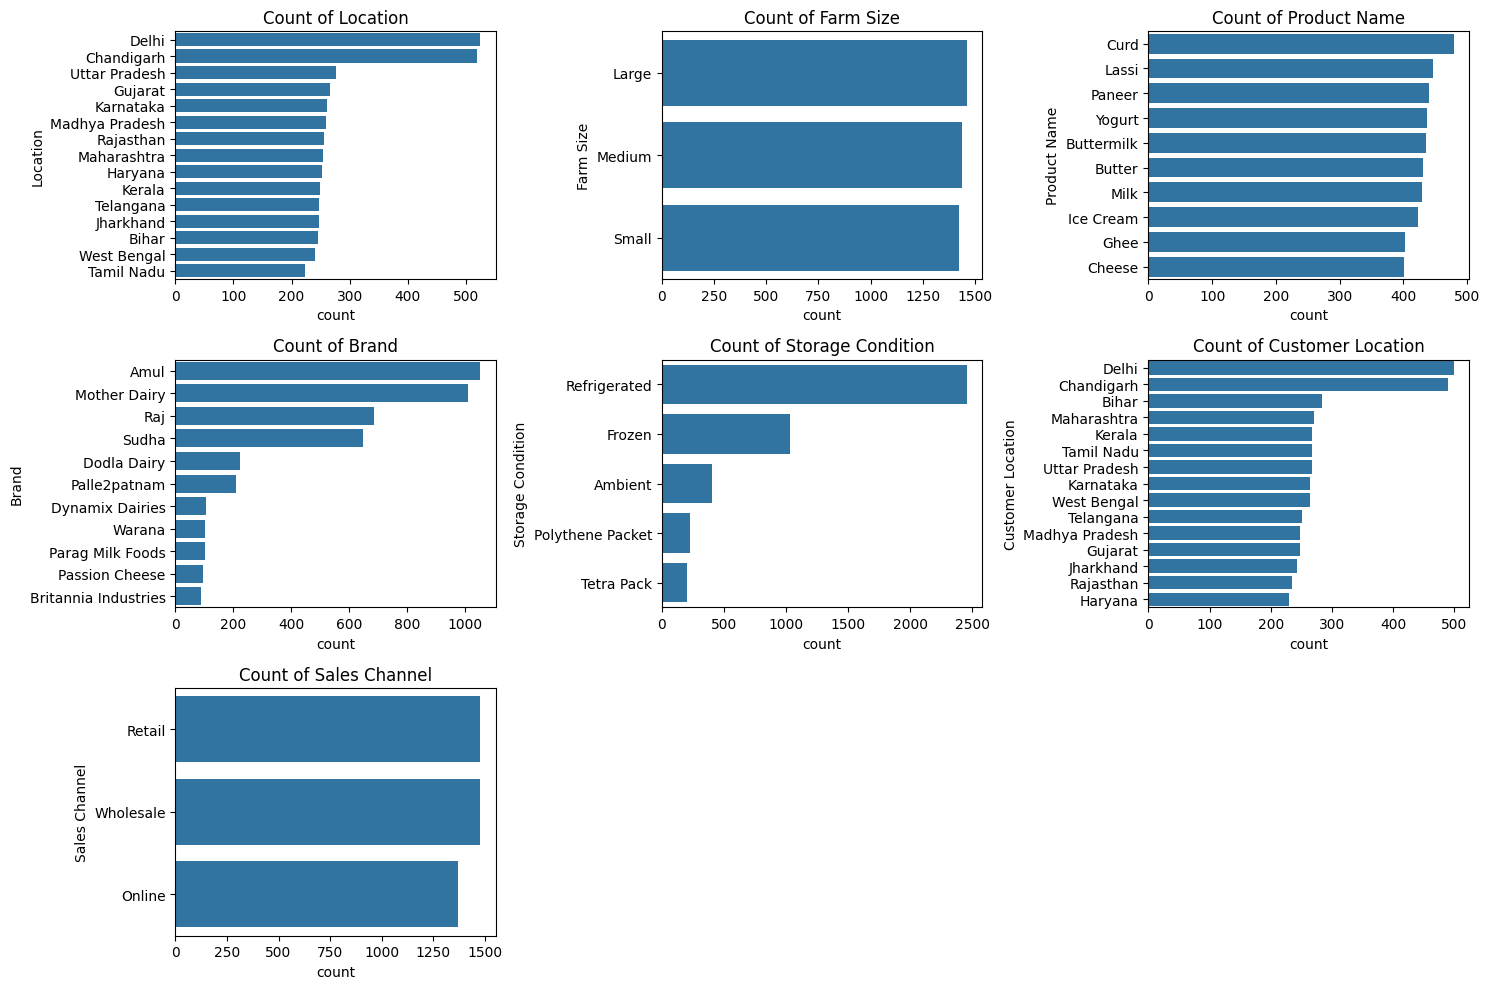

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Location', 'Farm Size', 'Product Name', 'Brand', 'Storage Condition', 'Customer Location', 'Sales Channel']):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
plt.tight_layout()
plt.show()

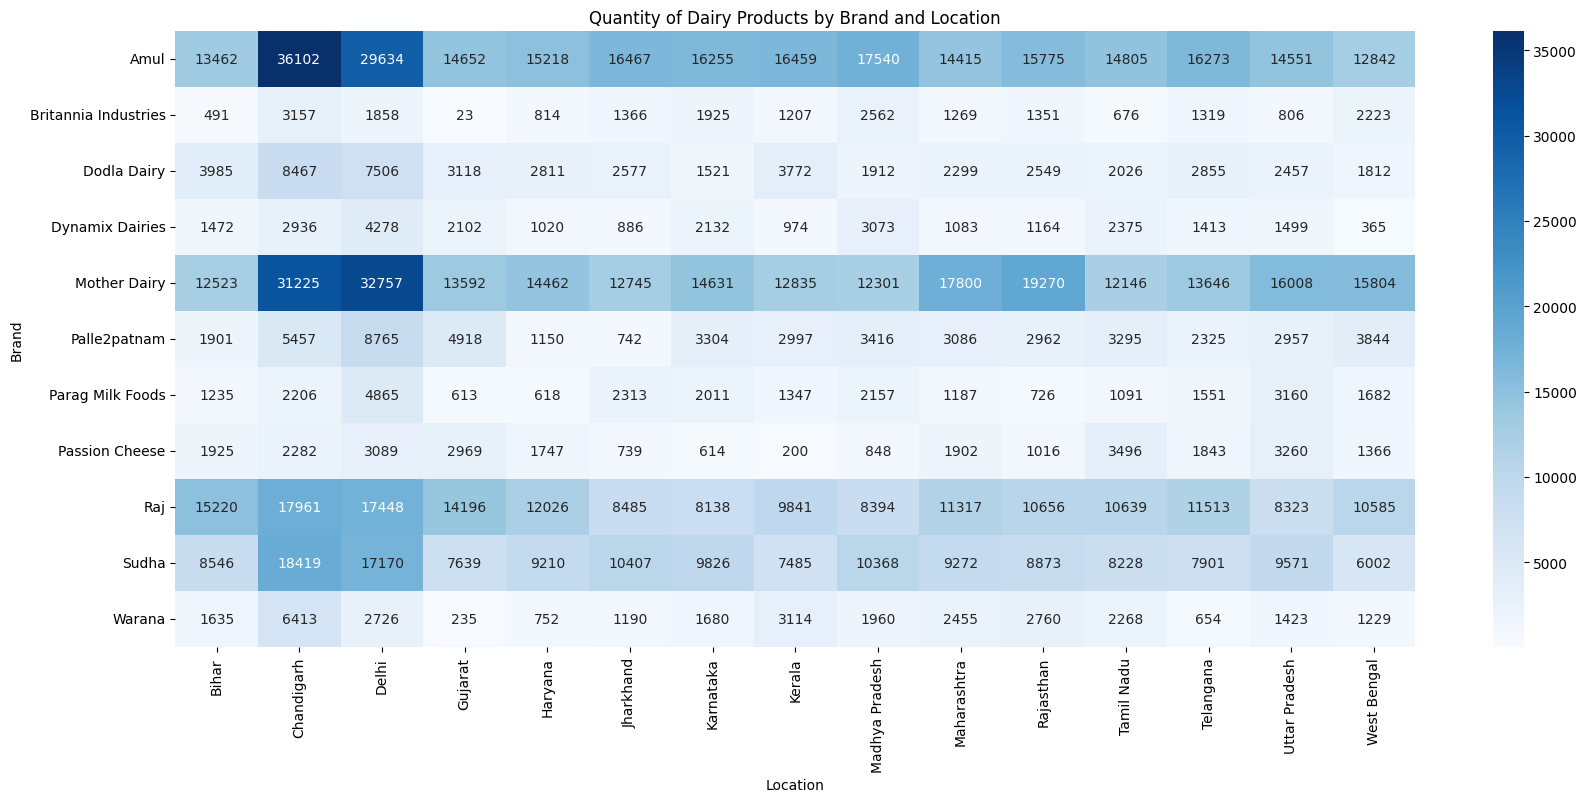

In [7]:
brand_customer_matrix = df.pivot_table(values='Quantity Sold (liters/kg)', index='Brand', columns='Location', aggfunc='sum')

plt.figure(figsize=(20, 8))
sns.heatmap(brand_customer_matrix, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Location')
plt.ylabel('Brand')
plt.title('Quantity of Dairy Products by Brand and Location');

In [8]:
brand_customer_matrix

Location              Bihar  Chandigarh  Delhi  Gujarat  Haryana  Jharkhand  \
Brand                                                                         
Amul                  13462       36102  29634    14652    15218      16467   
Britannia Industries    491        3157   1858       23      814       1366   
Dodla Dairy            3985        8467   7506     3118     2811       2577   
Dynamix Dairies        1472        2936   4278     2102     1020        886   
Mother Dairy          12523       31225  32757    13592    14462      12745   
Palle2patnam           1901        5457   8765     4918     1150        742   
Parag Milk Foods       1235        2206   4865      613      618       2313   
Passion Cheese         1925        2282   3089     2969     1747        739   
Raj                   15220       17961  17448    14196    12026       8485   
Sudha                  8546       18419  17170     7639     9210      10407   
Warana                 1635        6413   2726      235      752       1190   

Location              Karnataka  Kerala  Madhya Pradesh  Maharashtra  \
Brand                                                                  
Amul                      16255   16459           17540        14415   
Britannia Industries       1925    1207            2562         1269   
Dodla Dairy                1521    3772            1912         2299   
Dynamix Dairies            2132     974            3073         1083   
Mother Dairy              14631   12835           12301        17800   
Palle2patnam               3304    2997            3416         3086   
Parag Milk Foods           2011    1347            2157         1187   
Passion Cheese              614     200             848         1902   
Raj                        8138    9841            8394        11317   
Sudha                      9826    7485           10368         9272   
Warana                     1680    3114            1960         2455   

Location              Rajasthan  Tamil Nadu  Telangana  Uttar Pradesh  \
Brand                                                                   
Amul                      15775       14805      16273          14551   
Britannia Industries       1351         676       1319            806   
Dodla Dairy                2549        2026       2855           2457   
Dynamix Dairies            1164        2375       1413           1499   
Mother Dairy              19270       12146      13646          16008   
Palle2patnam               2962        3295       2325           2957   
Parag Milk Foods            726        1091       1551           3160   
Passion Cheese             1016        3496       1843           3260   
Raj                       10656       10639      11513           8323   
Sudha                      8873        8228       7901           9571   
Warana                     2760        2268        654           1423   

Location              West Bengal  
Brand                              
Amul                        12842  
Britannia Industries         2223  
Dodla Dairy                  1812  
Dynamix Dairies               365  
Mother Dairy                15804  
Palle2patnam                 3844  
Parag Milk Foods             1682  
Passion Cheese               1366  
Raj                         10585  
Sudha                        6002  
Warana                       1229

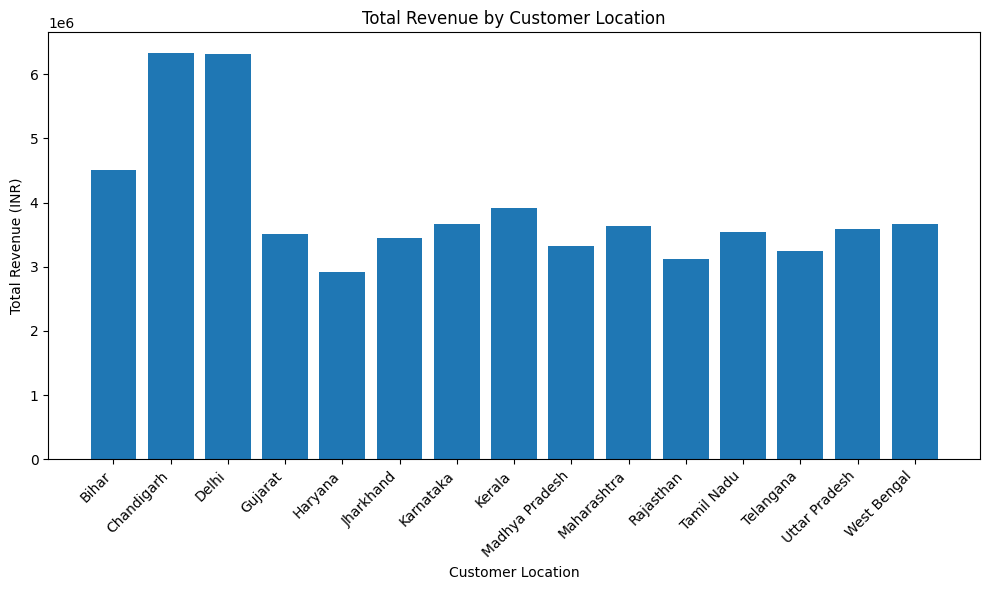

In [9]:
revenue_by_location = df.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(revenue_by_location['Customer Location'], revenue_by_location['Approx. Total Revenue(INR)'])
plt.xlabel('Customer Location')
plt.ylabel('Total Revenue (INR)')
plt.title('Total Revenue by Customer Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

<ipython-input-10-0806fdda4816>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Shelf Life (days)'], shade=True)


Text(0.5, 1.0, 'Density Plot of Shelf Life')

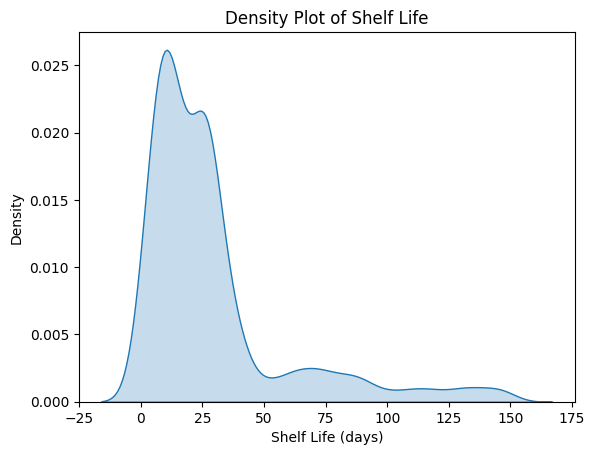

In [10]:
sns.kdeplot(df['Shelf Life (days)'], shade=True)
plt.xlabel('Shelf Life (days)')
plt.title('Density Plot of Shelf Life')

<ipython-input-11-5e3b8791b8c9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Approx. Total Revenue(INR)'], shade=True)


Text(0.5, 1.0, 'Density Plot of Total Revenue')

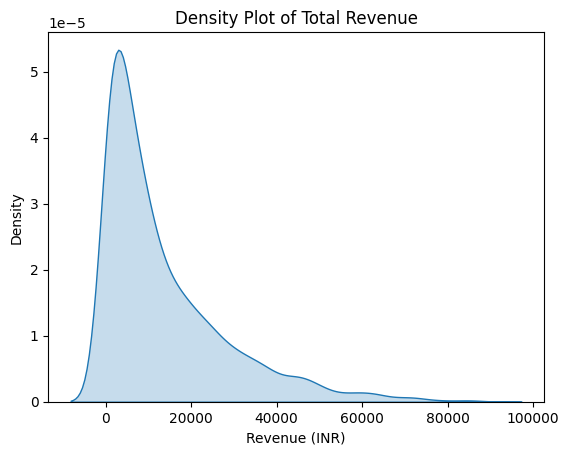

In [11]:
sns.kdeplot(df['Approx. Total Revenue(INR)'], shade=True)
plt.xlabel('Revenue (INR)')
plt.title('Density Plot of Total Revenue')

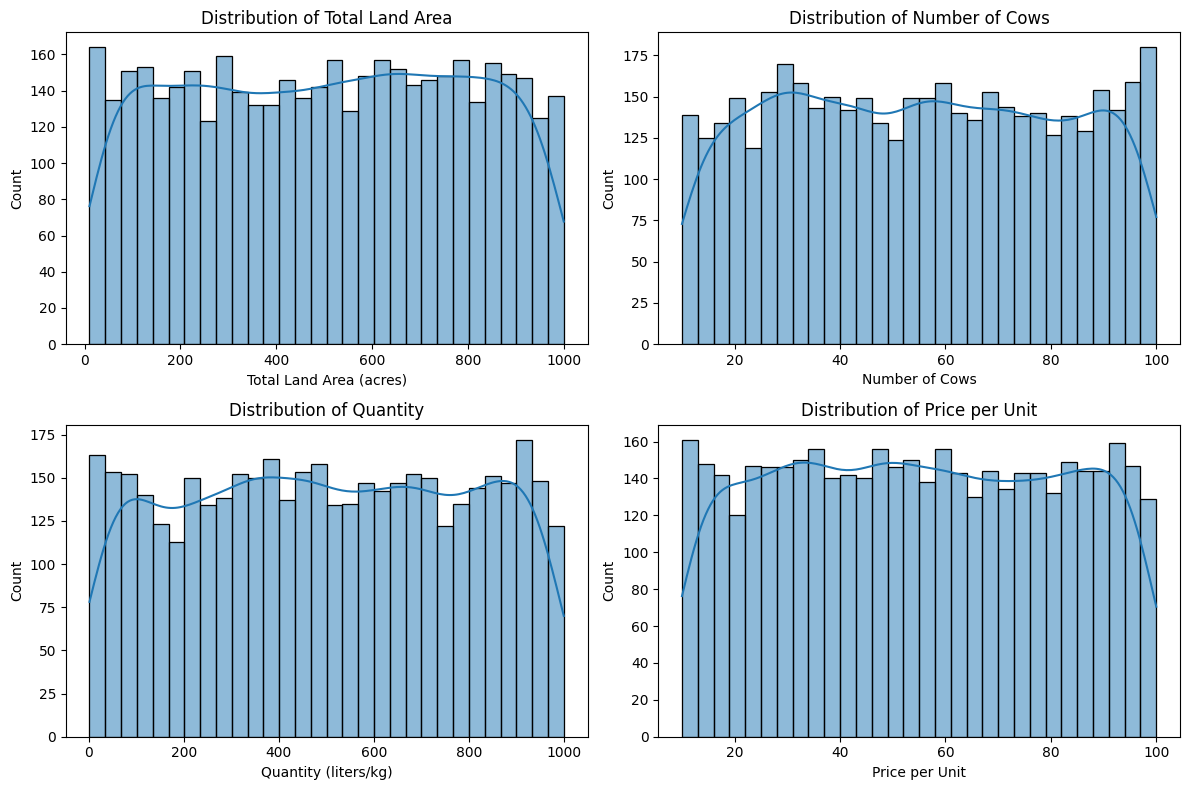

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Total Land Area (acres)'], bins=30, kde=True)
plt.title('Distribution of Total Land Area')

plt.subplot(2, 2, 2)
sns.histplot(df['Number of Cows'], bins=30, kde=True)
plt.title('Distribution of Number of Cows')

plt.subplot(2, 2, 3)
sns.histplot(df['Quantity (liters/kg)'], bins=30, kde=True)
plt.title('Distribution of Quantity')

plt.subplot(2, 2, 4)
sns.histplot(df['Price per Unit'], bins=30, kde=True)
plt.title('Distribution of Price per Unit')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Price per Unit by Product Name')

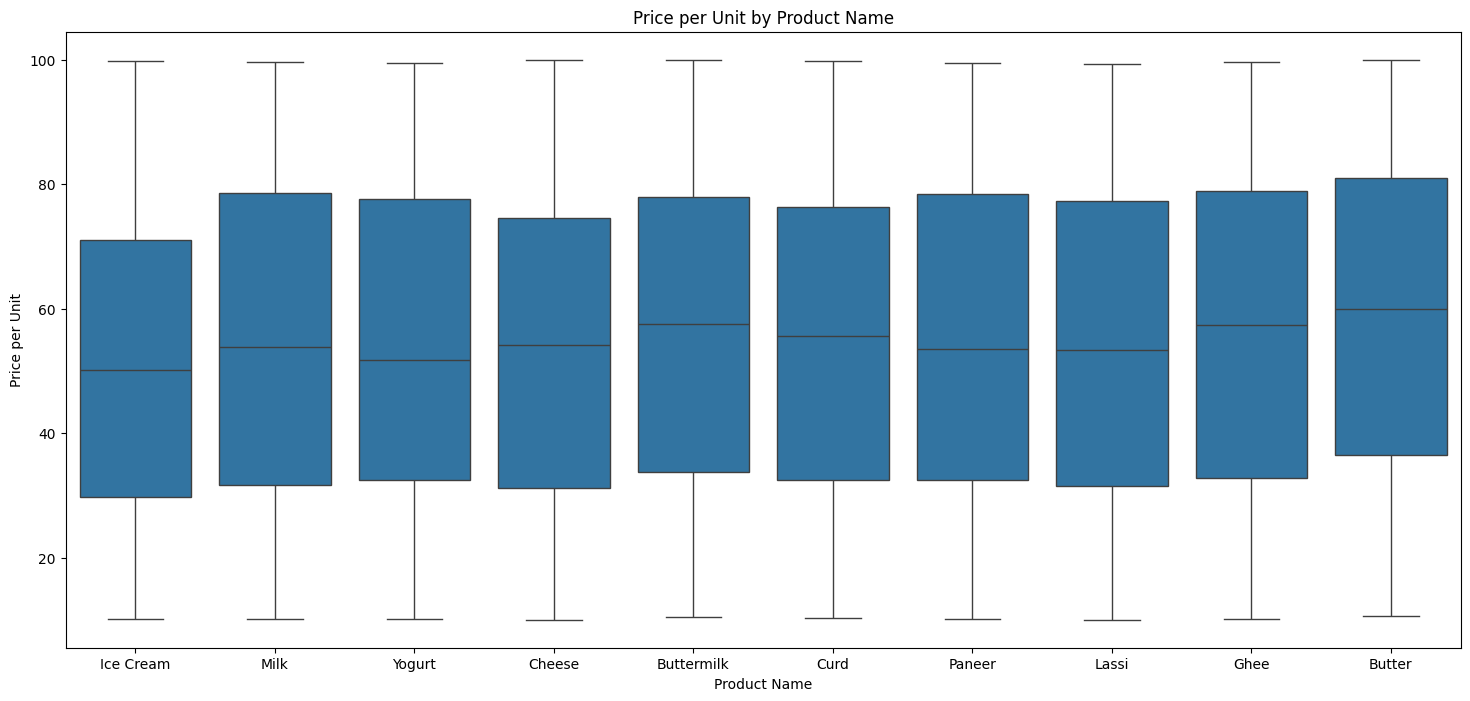

In [13]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Product Name', y='Price per Unit', data=df)
plt.title('Price per Unit by Product Name')

Text(0.5, 1.0, 'Total Value by Brand')

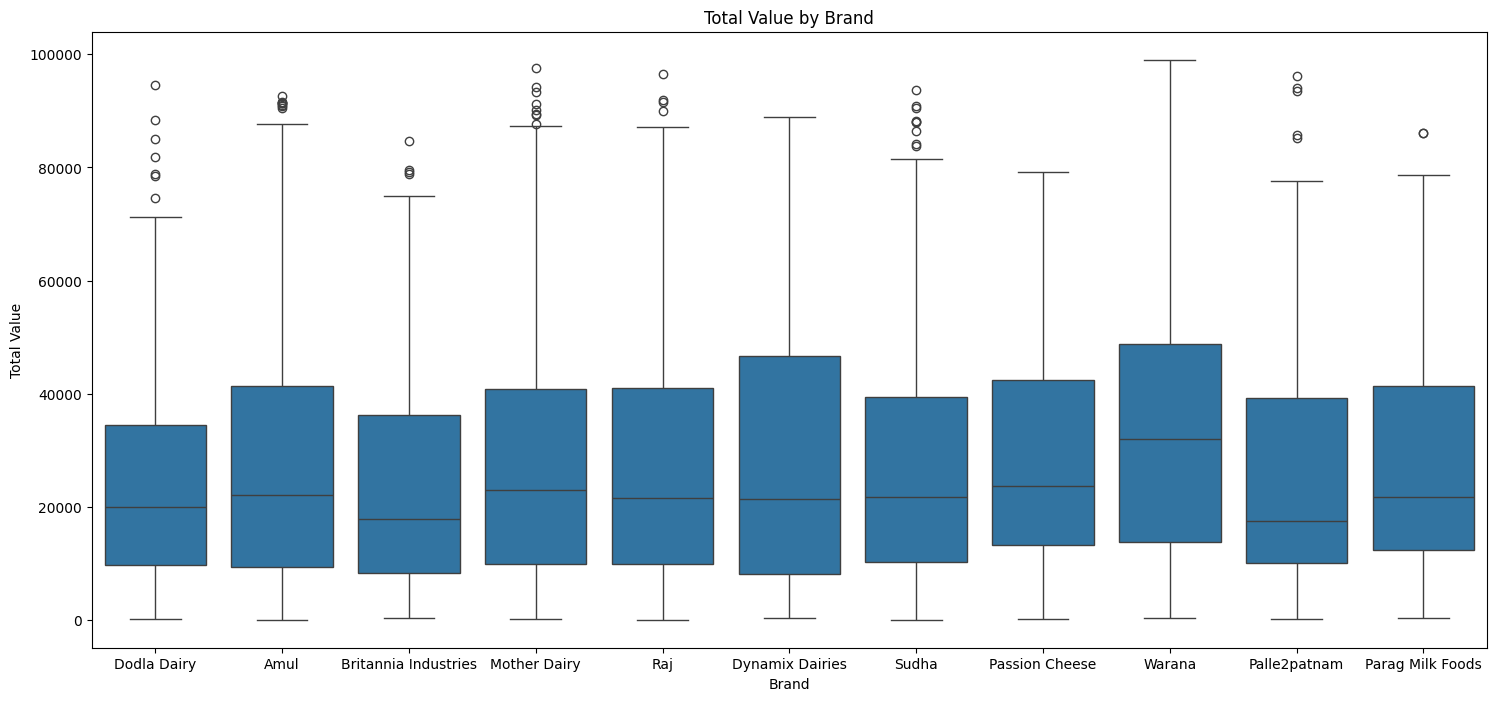

In [14]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Brand', y='Total Value', data=df)
plt.title('Total Value by Brand')

Text(0.5, 1.0, 'Quantity by Sales Channel')

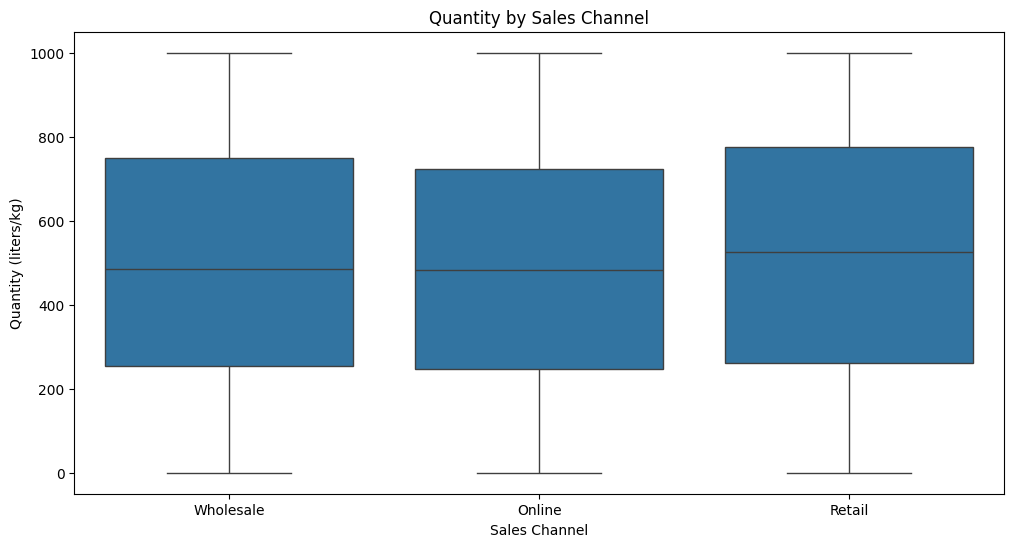

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales Channel', y='Quantity (liters/kg)', data=df)
plt.title('Quantity by Sales Channel')

Text(0.5, 1.0, 'Total Value vs. Quantity')

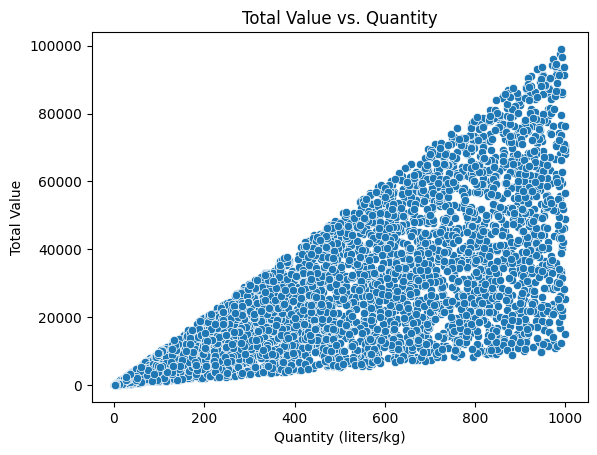

In [16]:
sns.scatterplot(x='Quantity (liters/kg)', y='Total Value', data=df)
plt.title('Total Value vs. Quantity')

Text(0.5, 1.0, 'Total Value vs. Price per Unit')

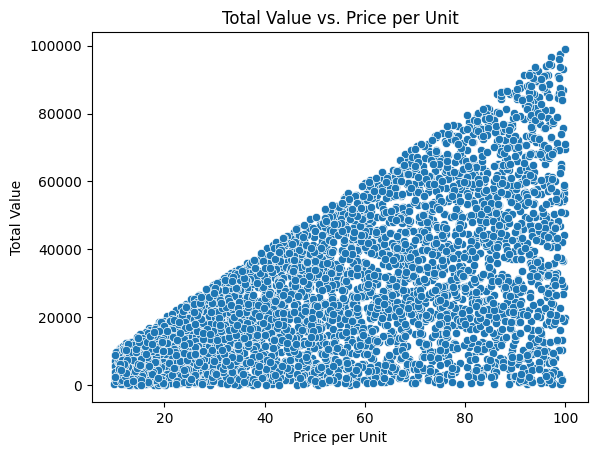

In [17]:
sns.scatterplot(x='Price per Unit', y='Total Value', data=df)
plt.title('Total Value vs. Price per Unit')

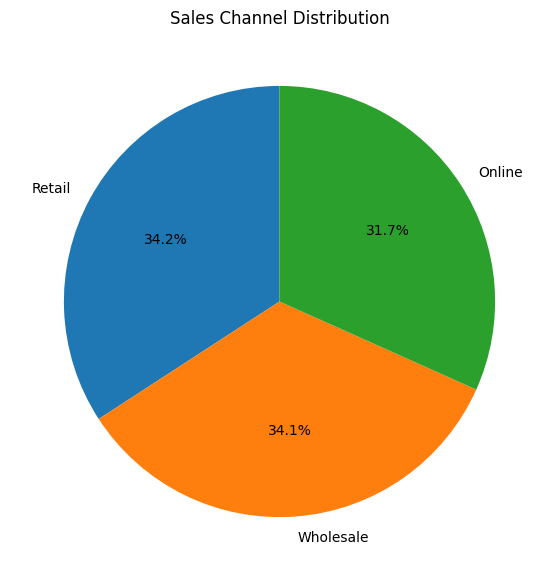

In [18]:
fig = plt.figure(figsize=(10, 7))
df['Sales Channel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sales Channel Distribution')
plt.ylabel('')
plt.show()

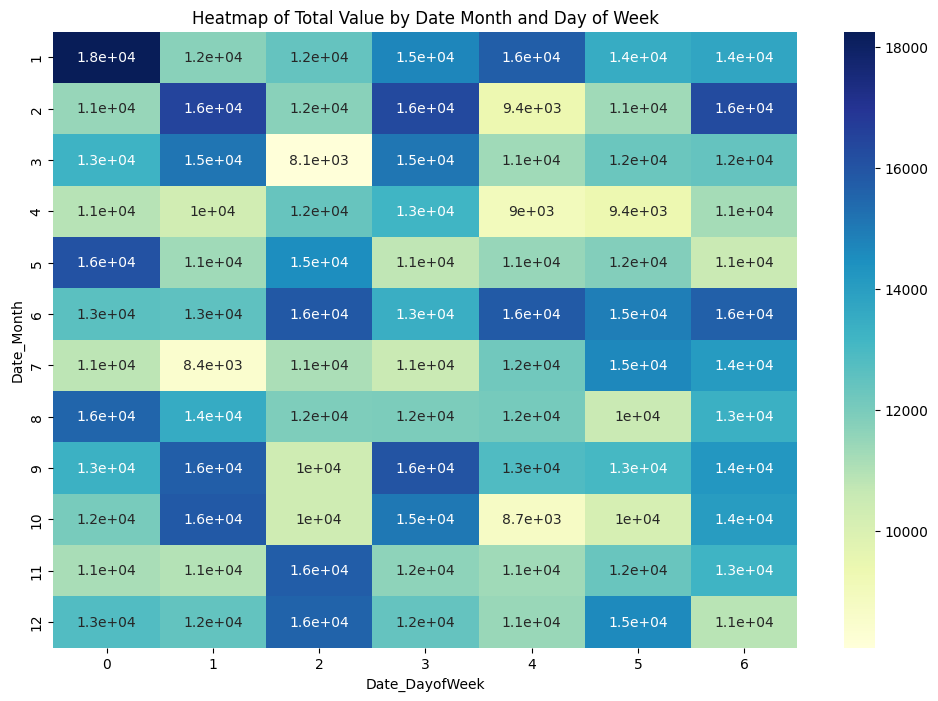

In [19]:
plt.figure(figsize=(12, 8))
heatmap_data = df.groupby(['Date_Month', 'Date_DayofWeek'])['Quantity Sold (liters/kg)'].sum().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Total Value by Date Month and Day of Week')
plt.show()

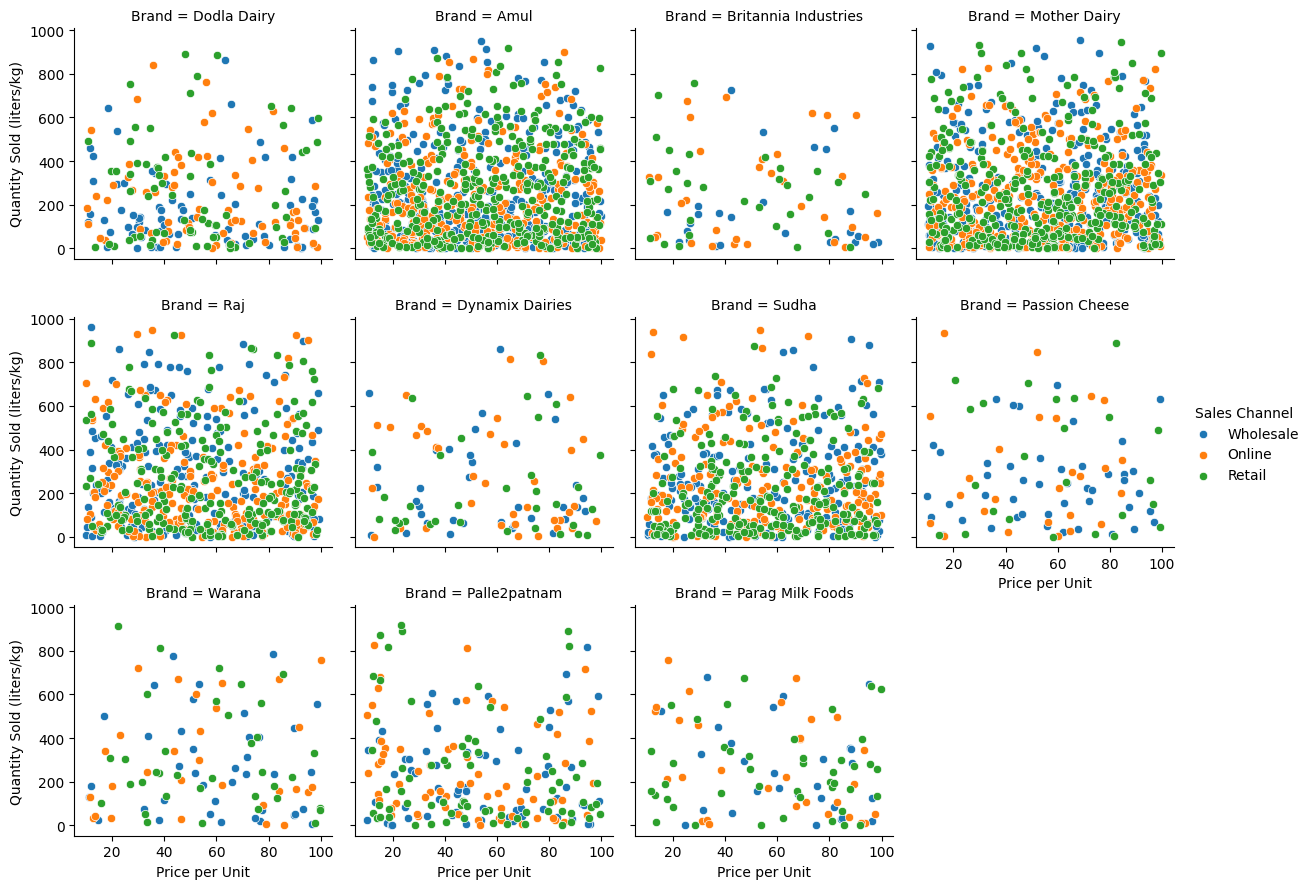

In [20]:
g = sns.FacetGrid(df, col='Brand', hue='Sales Channel', col_wrap=4)
g.map(sns.scatterplot, 'Price per Unit', 'Quantity Sold (liters/kg)')
g.add_legend()
plt.show()

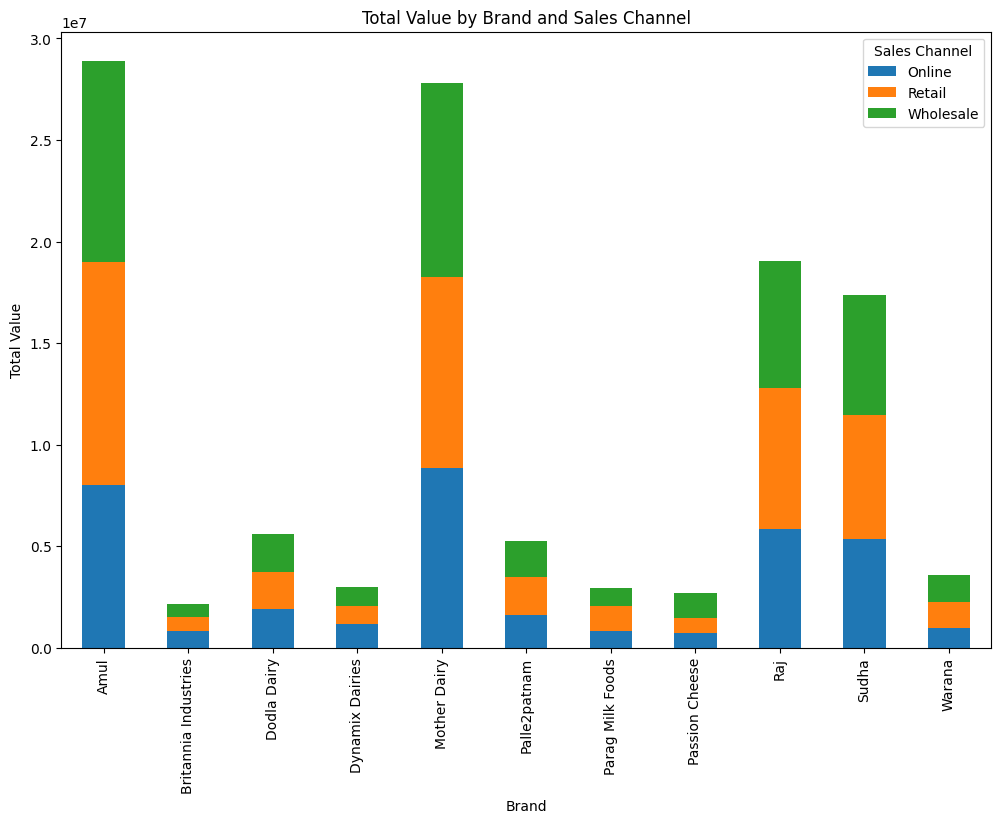

In [21]:
df.groupby(['Brand', 'Sales Channel'])['Total Value'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Value by Brand and Sales Channel')
plt.ylabel('Total Value')
plt.xlabel('Brand')
plt.show()

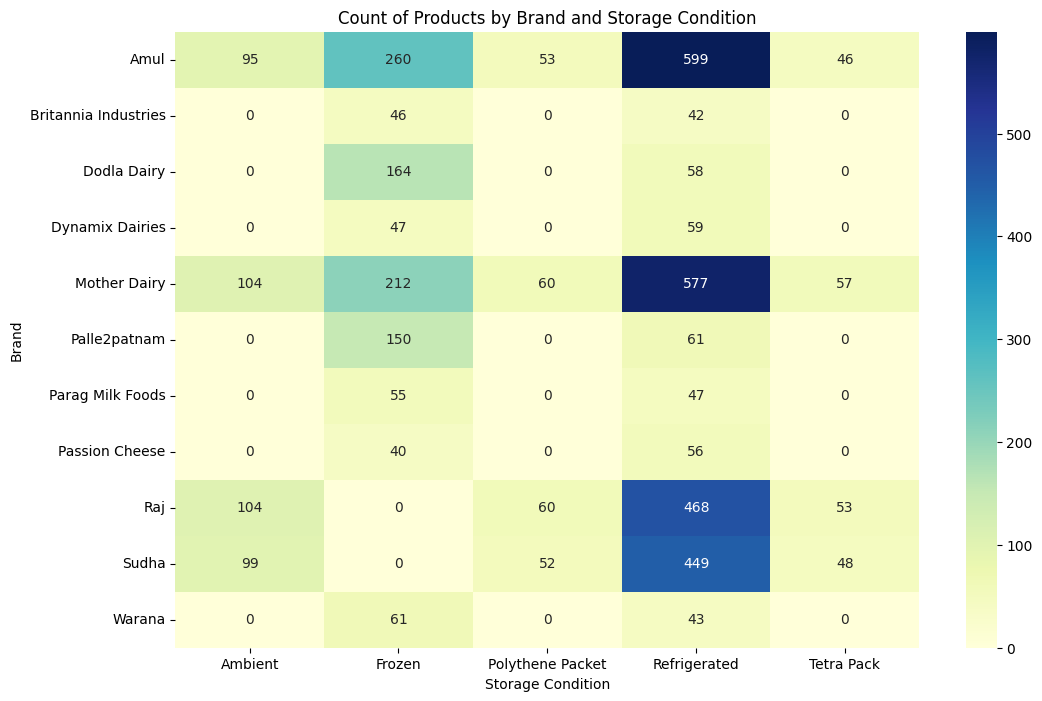

In [22]:
crosstab = pd.crosstab(df['Brand'], df['Storage Condition'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Count of Products by Brand and Storage Condition')
plt.xlabel('Storage Condition')
plt.ylabel('Brand')
plt.show()

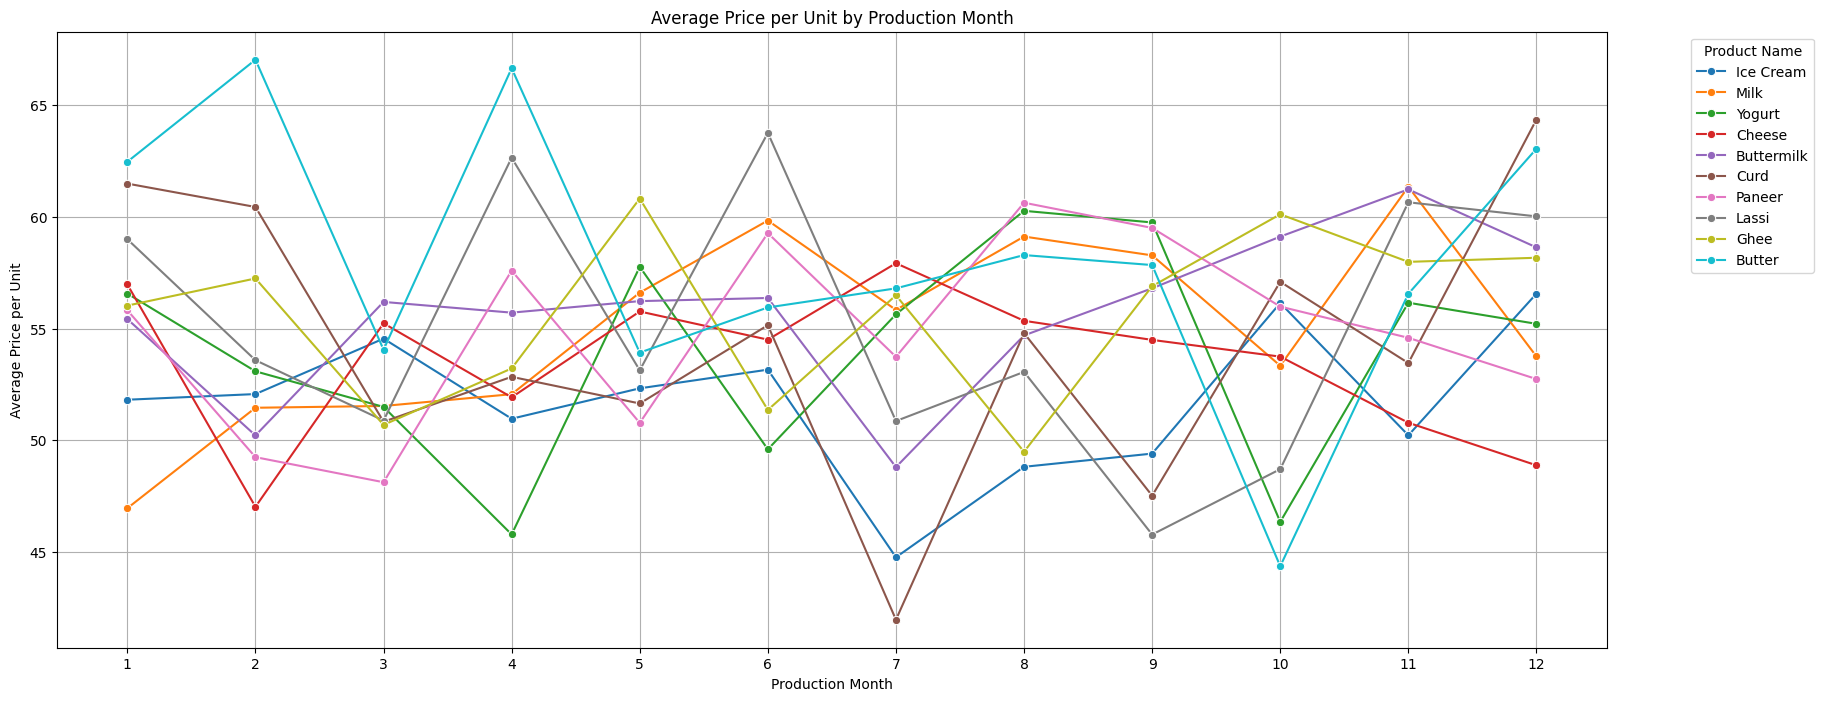

In [23]:
plt.figure(figsize=(20, 8))
for product_id in df['Product Name'].unique():
    product_df = df[df['Product Name'] == product_id]
    monthly_prices = product_df.groupby('Production_Month')['Price per Unit'].mean().reset_index()

    sns.lineplot(x='Production_Month', y='Price per Unit', data=monthly_prices, marker='o', label=product_id)

plt.title('Average Price per Unit by Production Month')
plt.xlabel('Production Month')
plt.ylabel('Average Price per Unit')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')

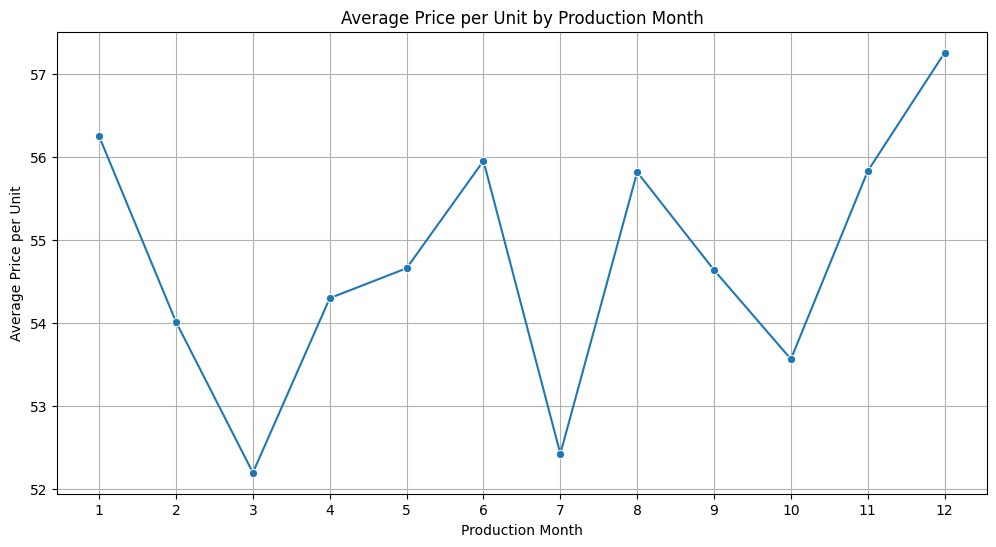

In [24]:
monthly_prices = df.groupby('Production_Month')['Price per Unit'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Production_Month', y='Price per Unit', data=monthly_prices, marker='o')
plt.title('Average Price per Unit by Production Month')
plt.xlabel('Production Month')
plt.ylabel('Average Price per Unit')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

<ipython-input-25-c0d9392ed0ac>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Location', y='Quantity Sold (liters/kg)', data=df, estimator='mean', ci=None)


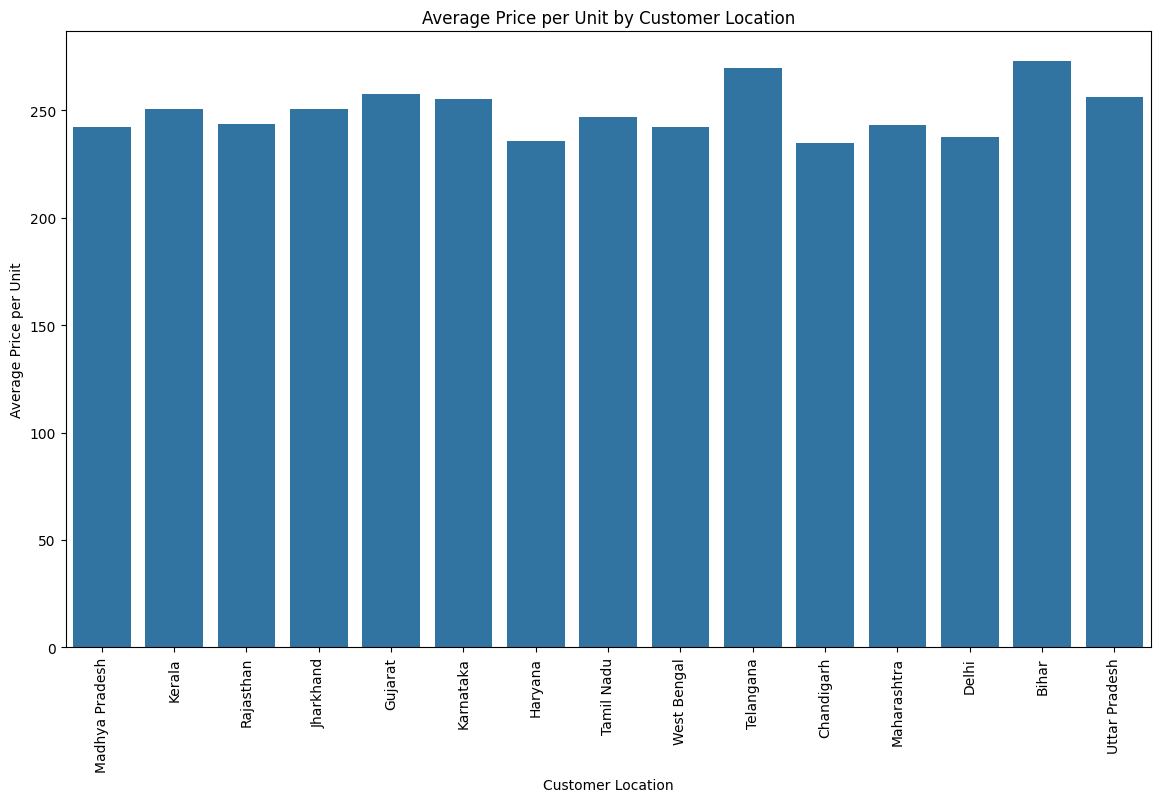

In [25]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Customer Location', y='Quantity Sold (liters/kg)', data=df, estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.title('Average Price per Unit by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Average Price per Unit')
plt.show()

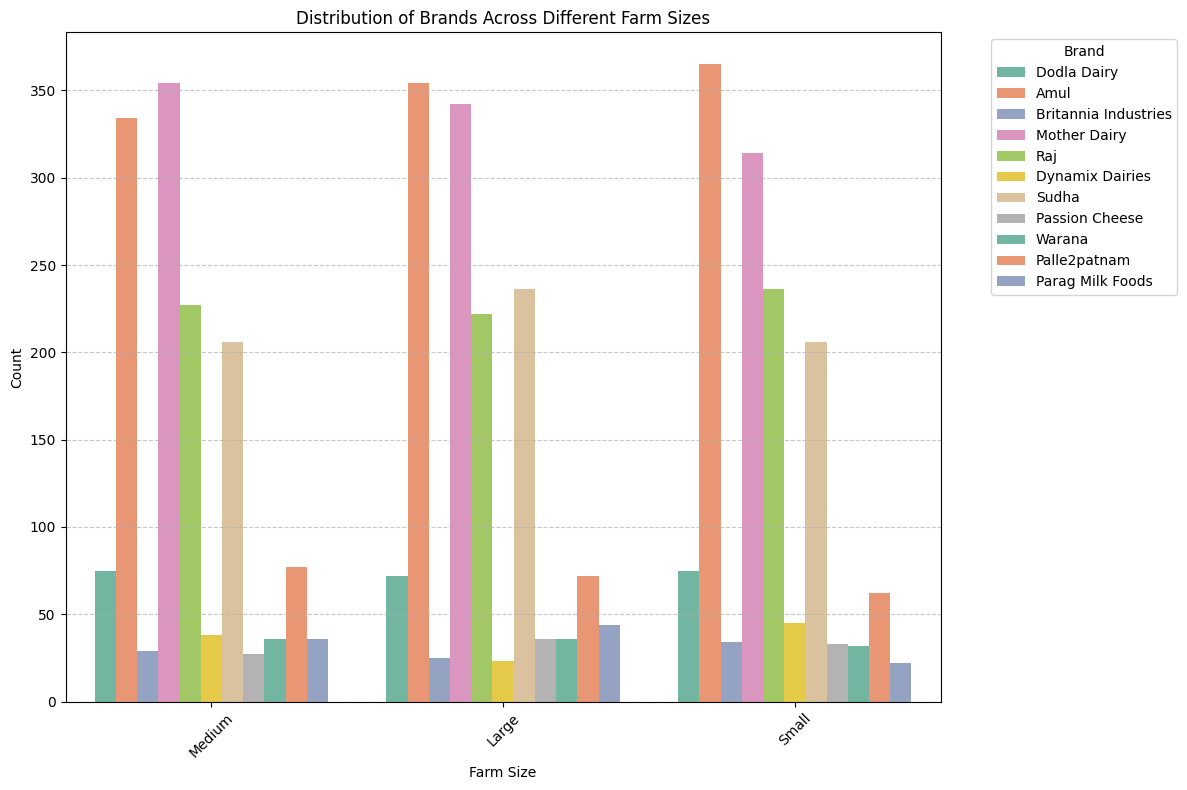

In [26]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Farm Size', hue='Brand', palette='Set2')
plt.xlabel('Farm Size')
plt.ylabel('Count')
plt.title('Distribution of Brands Across Different Farm Sizes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [27]:
columns_to_drop = ['Quantity Sold (liters/kg)', 'Quantity in Stock (liters/kg)','Price per Unit (sold)','Reorder Quantity (liters/kg)','Approx. Total Revenue(INR)']

In [28]:
feature_column = df.drop(columns=columns_to_drop,axis=1)
target_column = df['Approx. Total Revenue(INR)']

In [29]:
feature_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

In [30]:
X_temp, X_test, y_temp, y_test = train_test_split(feature_column, target_column, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1/0.9, random_state=42)

In [31]:
def extract_date_features(df, column_name):
    return pd.DataFrame({
        f'{column_name}_year': df[column_name].dt.year,
        f'{column_name}_month': df[column_name].dt.month,
        f'{column_name}_day': df[column_name].dt.day,
        f'{column_name}_weekday': df[column_name].dt.weekday
    }, columns=[f'{column_name}_year', f'{column_name}_month', f'{column_name}_day', f'{column_name}_weekday'])

In [32]:
date_transformer1 = FunctionTransformer(lambda df: extract_date_features(df, 'Production Date'))
date_transformer2 = FunctionTransformer(lambda df: extract_date_features(df, 'Expiration Date'))
date_transformer3 = FunctionTransformer(lambda df: extract_date_features(df, 'Date'))

In [33]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
         ('Production Date', Pipeline(steps=[
            ('date_features', date_transformer1),
            ('scaler', StandardScaler())
        ]), ['Production Date']),

        ('Expiration Date', Pipeline(steps=[
            ('date_features', date_transformer2),
            ('scaler', StandardScaler())
        ]), ['Expiration Date']),

        ('Date', Pipeline(steps=[
            ('date_features', date_transformer3),
            ('scaler', StandardScaler())
        ]), ['Date']),
        ('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [34]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso' : Lasso(),
    # 'Polynomial Regression': Pipeline([
    #     ('poly_features', PolynomialFeatures()),
    #     ('linear', LinearRegression())
    # ])
    # 'XGBoost': XGBRegressor()
}
param_grids = {
    'Linear Regression': {'model__fit_intercept': [True, False]},
    # 'Polynomial Regression': {
    #     'model__poly_features__degree': [2],
    #     'model__linear__fit_intercept': [True, False]
    # }
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'model__alpha': [0.1, 1.0, 10.0]},
    # 'XGBoost': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 4, 5]}
}

In [35]:
outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)
inner_kf = KFold(n_splits=8, shuffle=True, random_state=4)

results = {}

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    outer_mse_scores, outer_r2_scores = [], []
    outer_mae_scores, outer_rmse_scores = [], []
    best_params_list = []

    train_errors, validation_errors, test_errors = [], [], []

    grid_params = param_grids.get(model_name, {})

    for train_idx, val_idx in outer_kf.split(X_train):
        X_outer_train, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_outer_train, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params, cv=inner_kf,
                                   scoring='neg_mean_squared_error')
        grid_search.fit(X_outer_train, y_outer_train)

        best_model = grid_search.best_estimator_
        best_params_list.append(grid_search.best_params_)

        y_train_pred = best_model.predict(X_outer_train)
        y_val_pred = best_model.predict(X_val_fold)

        train_error = mean_squared_error(y_outer_train, y_train_pred)
        validation_error = mean_squared_error(y_val_fold, y_val_pred)
        test_error = mean_squared_error(y_val_fold, y_val_pred)

        train_errors.append(train_error)
        validation_errors.append(validation_error)
        test_errors.append(test_error)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        mae = mean_absolute_error(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)

        outer_mse_scores.append(mse)
        outer_r2_scores.append(r2)
        outer_mae_scores.append(mae)
        outer_rmse_scores.append(rmse)

    results[model_name] = {
        'Best Parameters': best_params_list,
        'MSE': outer_mse_scores,
        'RMSE': outer_rmse_scores,
        'R2': outer_r2_scores,
        'MAE': outer_mae_scores,
        'Train Errors': train_errors,
        'Validation Errors': validation_errors,
        'Test Errors': test_errors,
        'Mean MSE': np.mean(outer_mse_scores),
        'Mean RMSE': np.mean(outer_rmse_scores),
        'Mean R2': np.mean(outer_r2_scores),
        'Mean MAE': np.mean(outer_mae_scores)
    }

for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    print("Best Parameters for each fold:", scores['Best Parameters'])
    print("MSE Scores:", scores['MSE'])
    print("RMSE Scores:", scores['RMSE'])
    print("R2 Scores:", scores['R2'])
    print("MAE Scores:", scores['MAE'])
    print("Train Errors:", scores['Train Errors'])
    print("Validation Errors:", scores['Validation Errors'])
    print("Mean MSE:", scores['Mean MSE'])
    print("Mean RMSE:", scores['Mean RMSE'])
    print("Mean R2:", scores['Mean R2'])
    print("Mean MAE:", scores['Mean MAE'])

Evaluating model: Linear Regression
Evaluating model: Ridge
Evaluating model: Lasso


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+11, tolerance: 5.695e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+11, tolerance: 5.688e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.035e+10, tolerance: 5.863e


Model: Linear Regression
Best Parameters for each fold: [{'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}]
MSE Scores: [107988900.73513584, 126862846.6254029, 115201385.10127774, 88781080.18692464, 116323359.73742948, 91114845.89926596, 99604086.83221096, 102766551.91341533, 108498981.42236438, 98661357.31584089]
RMSE Scores: [10391.770818062523, 11263.340828786231, 10733.190816401138, 9422.371261361157, 10785.330766250494, 9545.409676869085, 9980.184709323317, 10137.38387915814, 10416.28443459396, 9932.842358350448]
R2 Scores: [0.5344838861731007, 0.38313128381383577, 0.5079410206963171, 0.5566358831886342, 0.4183386695492478, 0.534417829366099, 0.5553125397796108, 0.5111424657878967, 0.45709485189940346, 0.5200

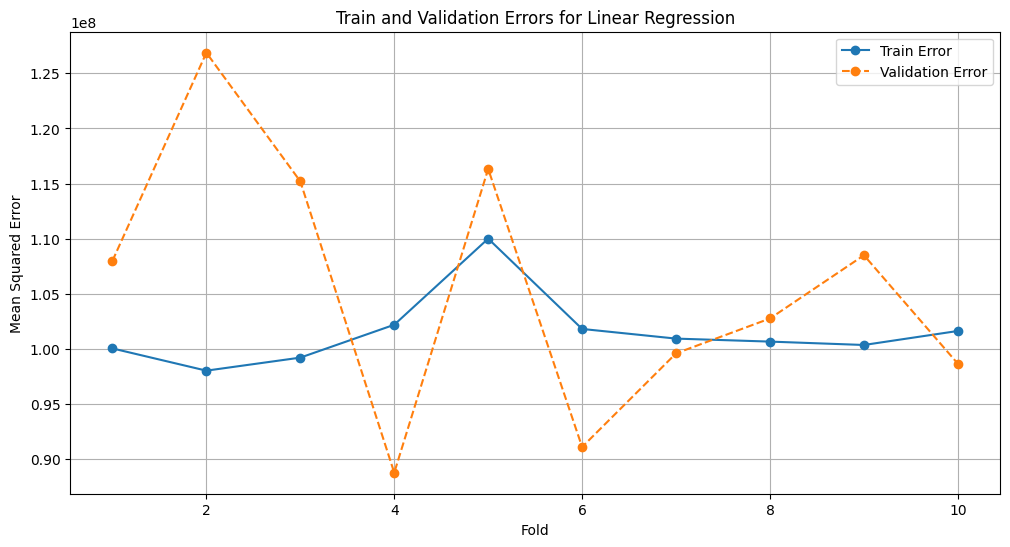

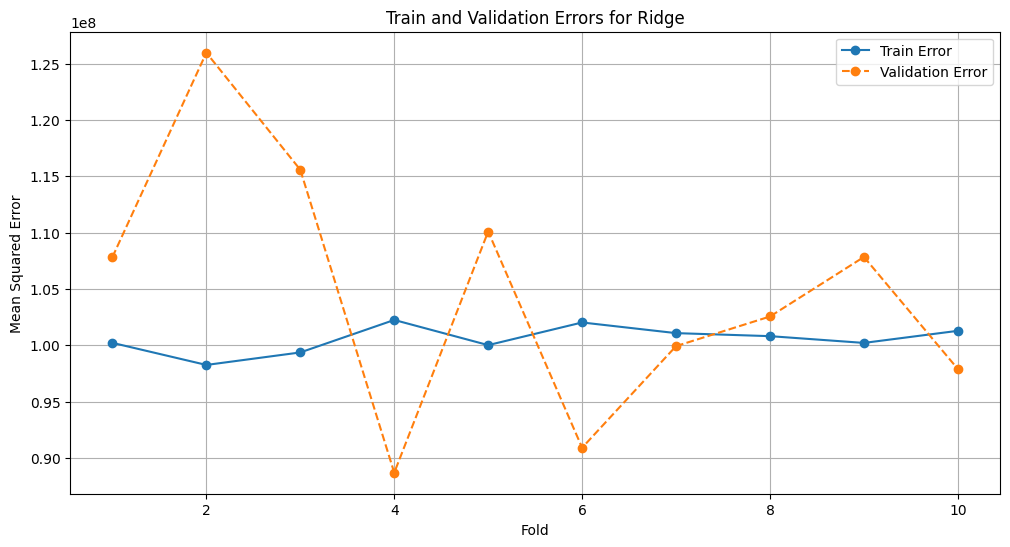

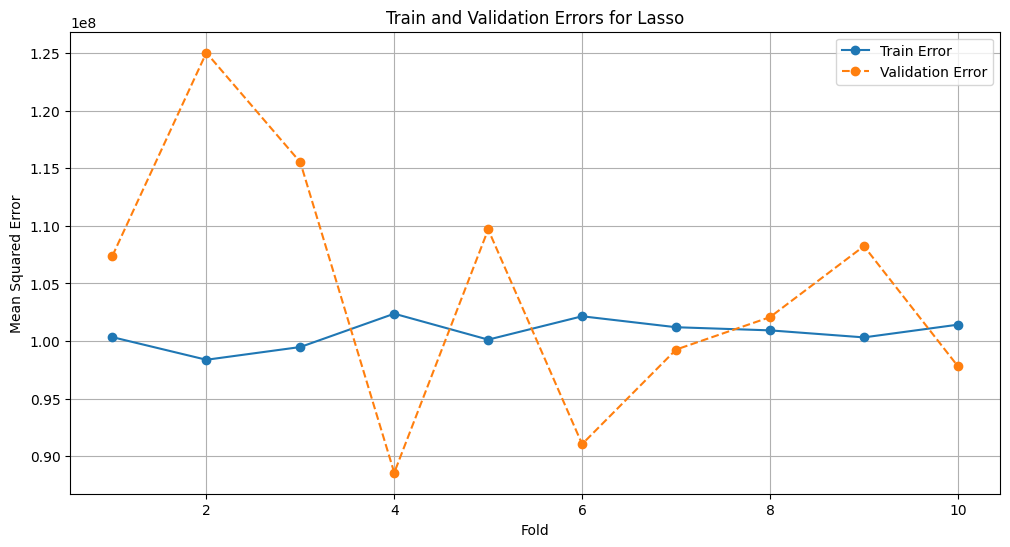

In [36]:
for model_name, metrics in results.items():
    folds = list(range(1, len(metrics['Train Errors']) + 1))

    plt.figure(figsize=(12, 6))
    plt.plot(folds, metrics['Train Errors'], marker='o', linestyle='-', label='Train Error')
    plt.plot(folds, metrics['Validation Errors'], marker='o', linestyle='--', label='Validation Error')
    plt.title(f'Train and Validation Errors for {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

In [37]:
for model_name, model in models.items():
    print(f"\nFinal evaluation on test set for model: {model_name}")

    best_model_params = results[model_name]['Best Parameters'][-1]
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    pipeline.fit(X_train, y_train)

    y_test_pred = pipeline.predict(X_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test R2: {test_r2}")
    print(f"Test MAE: {test_mae}")


Final evaluation on test set for model: Linear Regression
Test MSE: 94100916.8083799
Test RMSE: 9700.562705759903
Test R2: 0.5672944530096746
Test MAE: 6677.65845265589

Final evaluation on test set for model: Ridge
Test MSE: 93717011.86370596
Test RMSE: 9680.754715604871
Test R2: 0.5690597684254182
Test MAE: 6651.7243444521355

Final evaluation on test set for model: Lasso
Test MSE: 93605832.48691465
Test RMSE: 9675.010722832025
Test R2: 0.5695710060911093
Test MAE: 6646.627583426879


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.079e+09, tolerance: 7.297e+07
  model = cd_fast.enet_coordinate_descent(


In [38]:
for model_name, model in models.items():
    print(f"\nFeature Importance for model: {model_name}")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    result = permutation_importance(
        pipeline, X_train, y_train, n_repeats=10, random_state=42
    )

    importances = result.importances_mean
    std = result.importances_std

    feature_importance_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": importances, "Std": std}
    )

    feature_importance_df = feature_importance_df.sort_values(
        by="Importance", ascending=False
    )

    print(feature_importance_df)


Feature Importance for model: Linear Regression
                                Feature    Importance           Std
6                          Product Name  1.763919e+23  2.987122e+21
12                    Storage Condition  1.098720e+23  2.004391e+21
5                            Product ID  1.790138e+22  2.990902e+20
13                      Production Date  5.787044e+02  8.981542e+00
14                      Expiration Date  5.666262e+02  8.977351e+00
11                    Shelf Life (days)  2.557352e+00  2.463344e-02
10                          Total Value  9.634291e-01  2.183469e-02
4                                  Date  9.670544e-02  7.792366e-03
7                                 Brand  6.652289e-03  1.241467e-03
0                              Location  5.758179e-03  1.367375e-03
15                    Customer Location  3.112900e-03  7.682107e-04
9                        Price per Unit  1.819005e-03  6.773448e-04
1               Total Land Area (acres)  5.878437e-04  3.623956e-04

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.079e+09, tolerance: 7.297e+07
  model = cd_fast.enet_coordinate_descent(


                                Feature  Importance       Std
10                          Total Value    0.972956  0.021721
4                                  Date    0.013644  0.002885
13                      Production Date    0.008846  0.001726
11                    Shelf Life (days)    0.007907  0.001952
6                          Product Name    0.005973  0.001437
7                                 Brand    0.004223  0.000827
0                              Location    0.004023  0.001058
15                    Customer Location    0.003969  0.000896
14                      Expiration Date    0.003142  0.000708
9                        Price per Unit    0.001757  0.000661
12                    Storage Condition    0.000951  0.000597
1               Total Land Area (acres)    0.000617  0.000405
3                             Farm Size    0.000377  0.000374
8                  Quantity (liters/kg)    0.000306  0.000227
17  Minimum Stock Threshold (liters/kg)    0.000181  0.000108
16      

In [39]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return 'Unknown'
df['Season'] = df['Date_Month'].apply(get_season)

In [40]:
df['Avg Unit Price'] = df.groupby('Product ID')['Price per Unit'].transform('mean')
df['Avg Quantity'] = df.groupby('Product ID')['Quantity (liters/kg)'].transform('mean')

In [41]:
df['Days Until Expiration'] = (pd.to_datetime(df['Expiration Date']) - pd.to_datetime(df['Date'])).dt.days

In [42]:
df['Days Since Production'] = (pd.to_datetime(df['Date']) - pd.to_datetime(df['Production Date'])).dt.days

In [43]:
df['Shelf Life Remaining'] = df['Shelf Life (days)'] - df['Days Since Production']

In [44]:
df['Price Difference'] = df['Price per Unit'] - df['Price per Unit (sold)']
df['Price Difference Mean'] = df.groupby('Product ID')['Price Difference'].transform('mean')

In [45]:
df['Sales Channel Encoding'] = df['Sales Channel'].astype('category').cat.codes

In [46]:
df['Customer Location Encoding'] = df['Customer Location'].astype('category').cat.codes

In [47]:
df['Avg Price per Unit by Brand'] = df.groupby('Brand')['Price per Unit'].transform('mean')

In [48]:
df['Consumption Value'] = df['Quantity (liters/kg)'] - df['Quantity in Stock (liters/kg)']

count    4325.000000
mean      248.583986
std       217.023620
min         1.030000
25%        69.400000
50%       189.630000
75%       374.380000
max       960.380000
Name: Consumption Value, dtype: float64


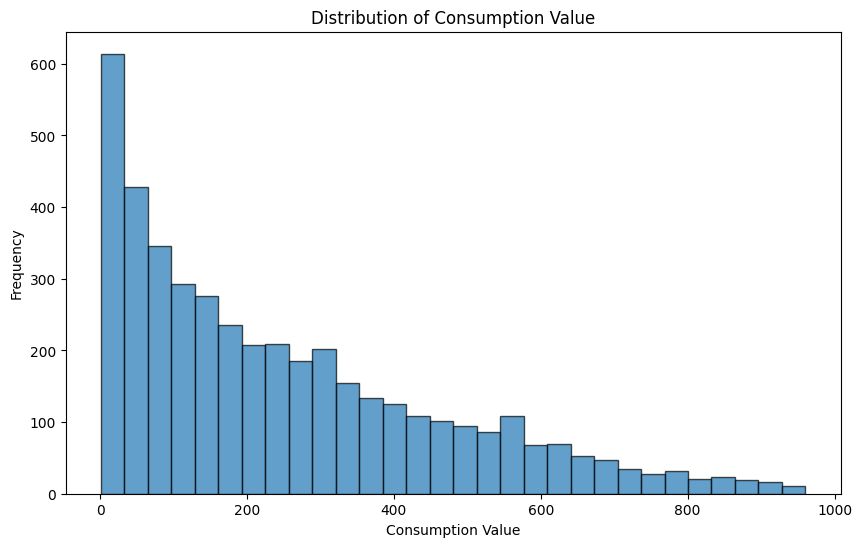

In [49]:
print(df['Consumption Value'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df['Consumption Value'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Consumption Value')
plt.ylabel('Frequency')
plt.title('Distribution of Consumption Value')
plt.show()

In [50]:
average_sold = df['Quantity Sold (liters/kg)'].mean()
df['Category'] = pd.cut(
    df['Consumption Value'],
    bins=[-float('inf'), 0, average_sold, float('inf')],
    labels=[0, 1, 2]
).astype(int)

In [51]:
df['Avg Reorder Qunatity by Brand'] = df.groupby('Brand')['Reorder Quantity (liters/kg)'].transform('mean')
df['Avg Reorder Qunatity by Product'] = df.groupby('Product ID')['Reorder Quantity (liters/kg)'].transform('mean')

In [52]:
print(df.isna().sum())

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
Production_Month                       0
Production_Year 

In [53]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)', 'Production_Month', 'Production_Year',
       'Production_DayofWeek', 'Expiration_Month', 'Expiration_Year',
       'Expiration_DayofWeek', 'Date_Month', 'Date_Year', 'Date_DayofWeek',
       'Season', 'Avg Unit Price', 'Avg Quantity', 'Days Until Expiration',
       'Days Since Production', 'Shelf Life Remaining', 'Price Difference',
       'Price Difference Mean', 'Sales Channel Encoding',
       'Customer Location Encoding', 'Avg Price per Unit by Brand',
 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

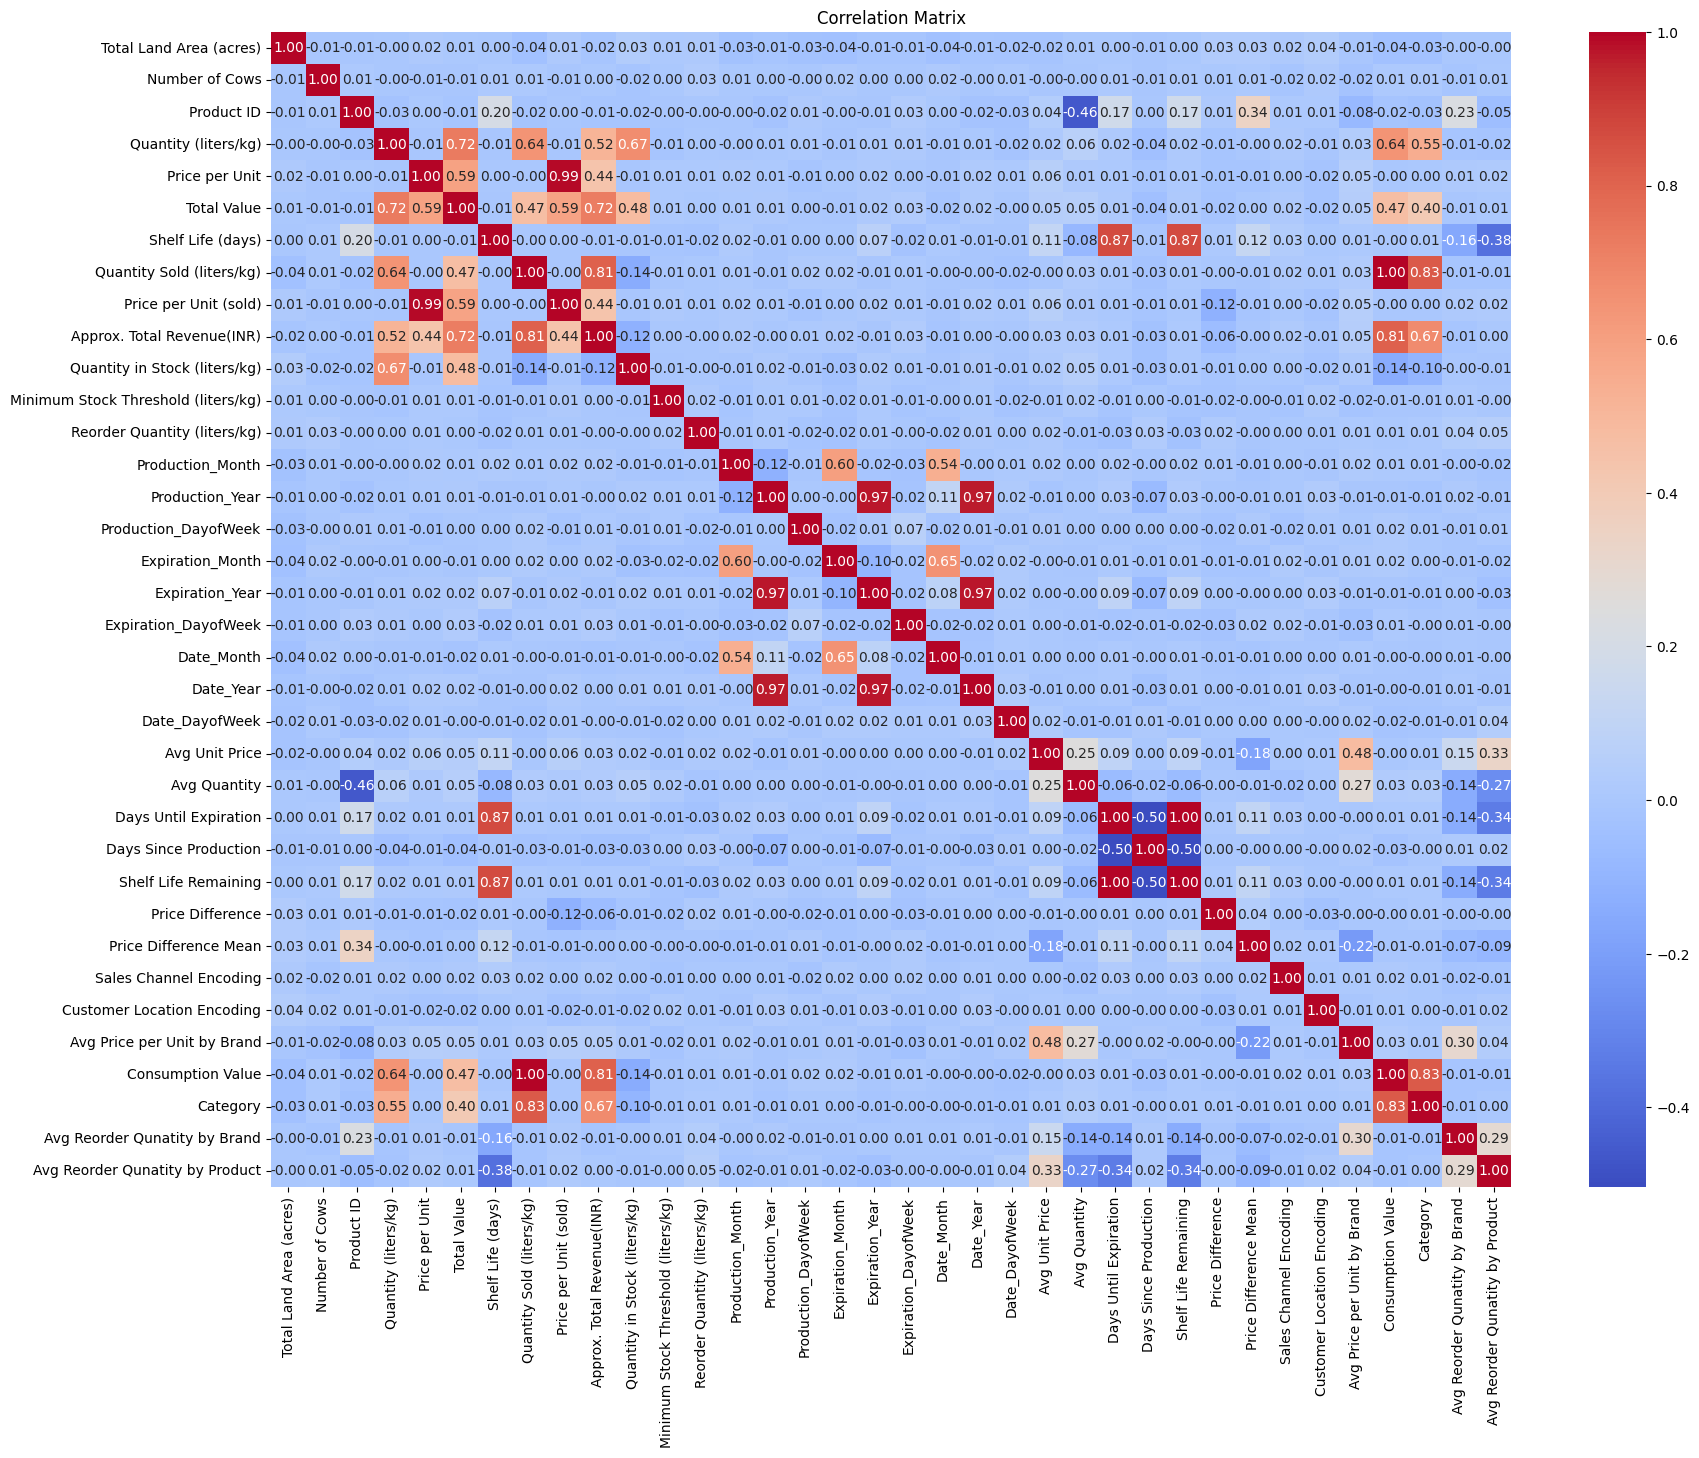

In [55]:
numerical_df = df.select_dtypes(include=np.number)

corr_matrix = numerical_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


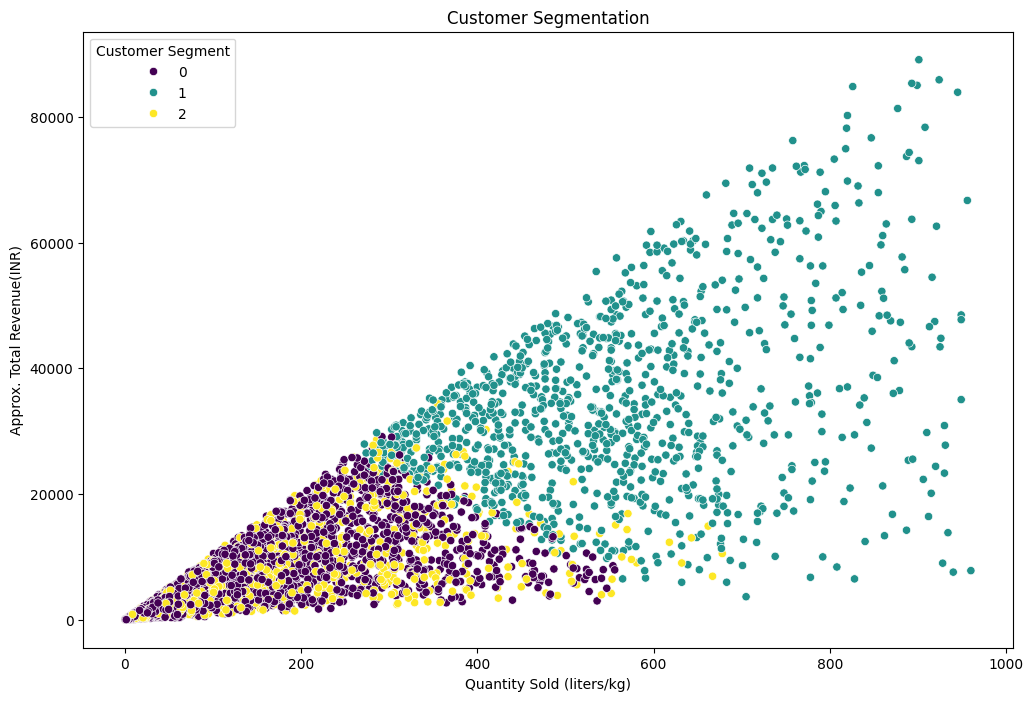

In [56]:
features = df[['Quantity Sold (liters/kg)', 'Approx. Total Revenue(INR)', 'Avg Unit Price']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)
df['Customer Segment'] = kmeans.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity Sold (liters/kg)', y='Approx. Total Revenue(INR)', hue='Customer Segment', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [57]:
df = df.drop(columns=['Customer Segment'],axis=1)

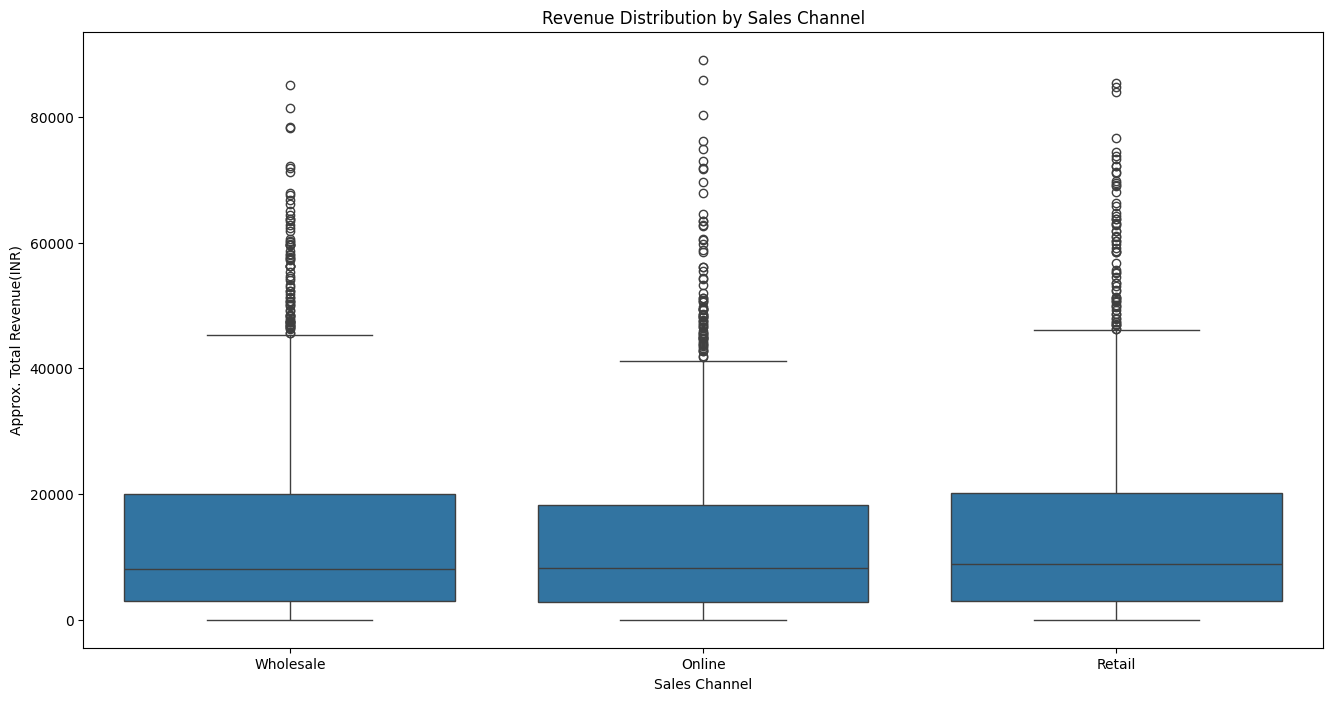

In [58]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Sales Channel', y='Approx. Total Revenue(INR)', data=df)
plt.title('Revenue Distribution by Sales Channel')
plt.show()

In [59]:
fig = px.scatter(df, x='Price per Unit (sold)', y='Approx. Total Revenue(INR)', color='Brand', size='Quantity Sold (liters/kg)', hover_name='Customer Location')
fig.update_layout(title='Interactive Scatter Plot')
fig.show()

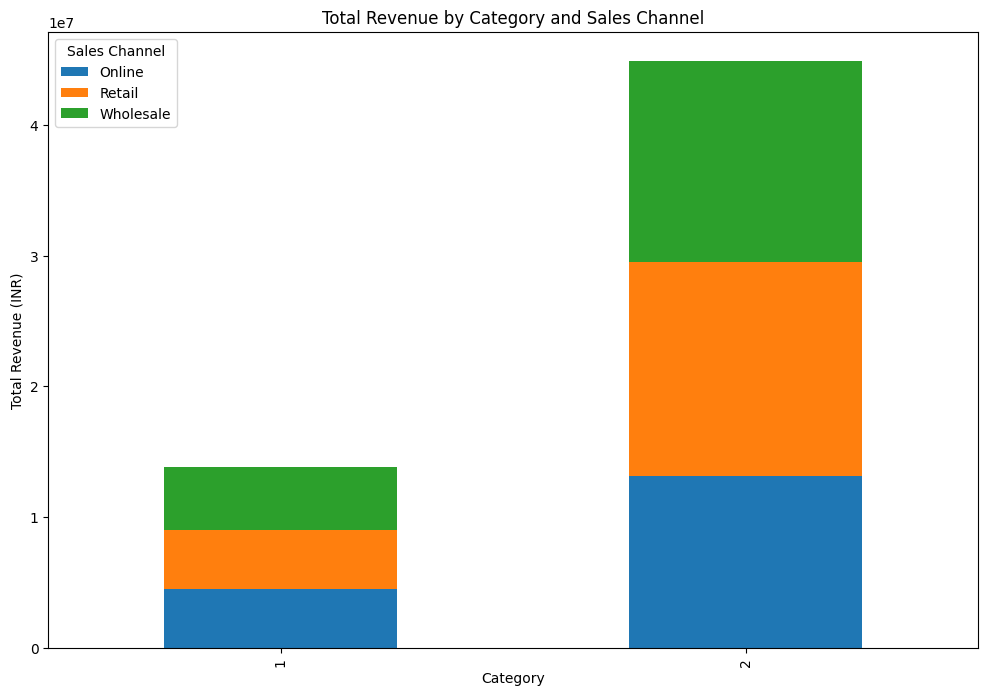

In [60]:
df.groupby(['Category', 'Sales Channel'])['Approx. Total Revenue(INR)'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Revenue by Category and Sales Channel')
plt.ylabel('Total Revenue (INR)')
plt.xlabel('Category')
plt.show()

<Figure size 1200x800 with 0 Axes>

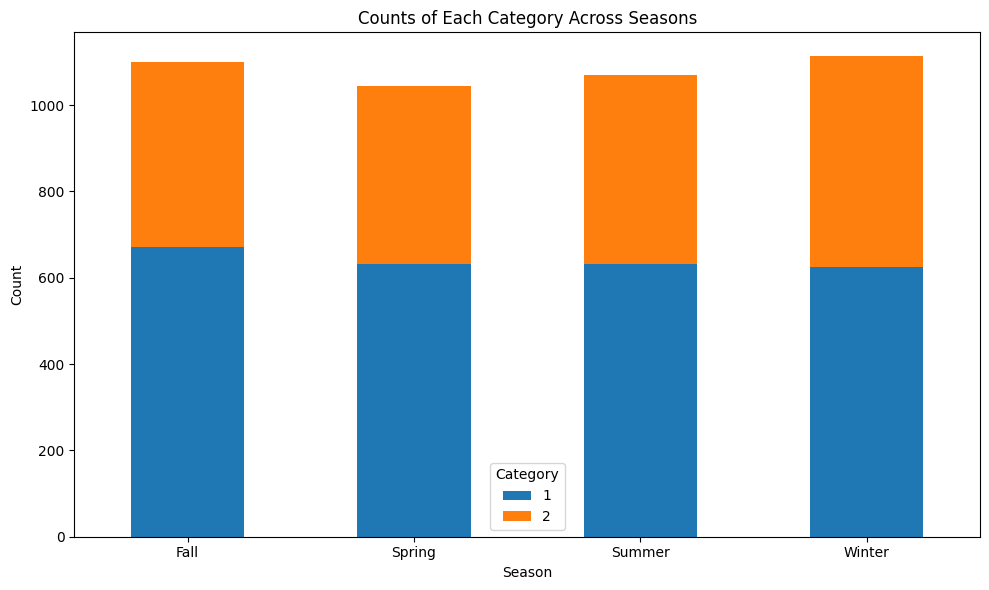

In [61]:
plt.figure(figsize=(12, 8))
result = df.groupby(['Season', 'Category']).size().reset_index(name='Count')
pivot_table = result.pivot(index='Season', columns='Category', values='Count').fillna(0)

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Each Category Across Seasons')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

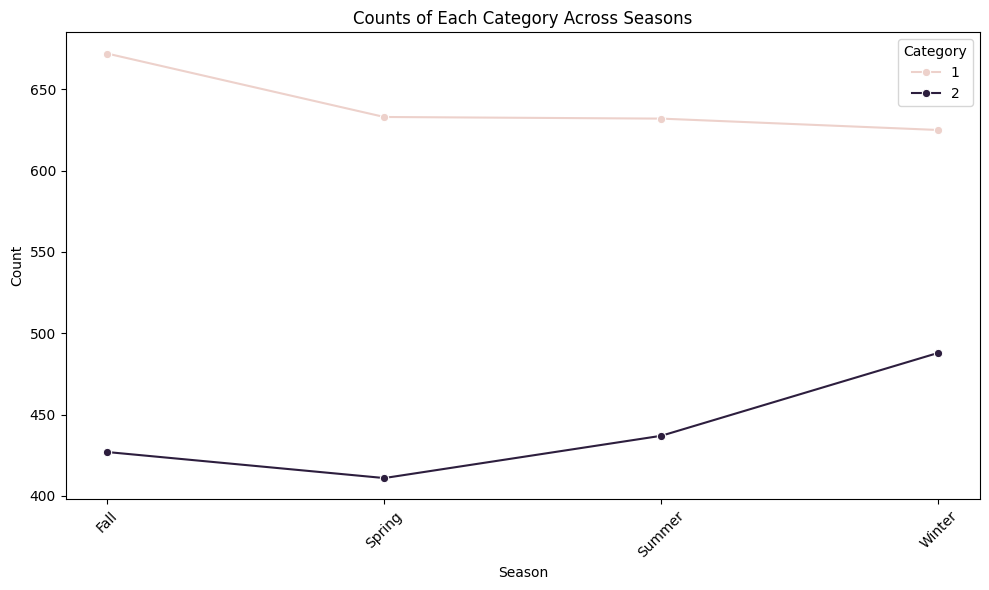

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=result, x='Season', y='Count', hue='Category', marker='o')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Each Category Across Seasons')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
result

Season  Category  Count
0    Fall         1    672
1    Fall         2    427
2  Spring         1    633
3  Spring         2    411
4  Summer         1    632
5  Summer         2    437
6  Winter         1    625
7  Winter         2    488

In [64]:
columns_to_drop = ['Quantity Sold (liters/kg)', 'Quantity in Stock (liters/kg)','Consumption Value','Price per Unit (sold)','Approx. Total Revenue(INR)','Reorder Quantity (liters/kg)']

In [65]:
feature_column = df.drop(columns=columns_to_drop,axis=1)
target_column = df['Approx. Total Revenue(INR)']

In [66]:
feature_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

In [67]:
X = pd.get_dummies(feature_column, drop_first=True)
X.drop(['Date','Production Date', 'Expiration Date'], axis=1, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_scaled

array([[-0.67380805,  1.57176211, -0.17926771, ..., -0.56408835,
        -0.57298949,  1.69879192],
       [-1.69391283, -0.41992887, -1.58640539, ..., -0.56408835,
        -0.57298949,  1.69879192],
       [ 0.27354452, -1.18596386, -0.53105213, ..., -0.56408835,
        -0.57298949,  1.69879192],
       ...,
       [-0.67135966,  0.38440787,  0.17251671, ..., -0.56408835,
        -0.57298949,  1.69879192],
       [ 1.35384475,  1.34195162,  0.17251671, ..., -0.56408835,
        -0.57298949, -0.58865361],
       [-0.03715634,  0.11629562, -1.58640539, ..., -0.56408835,
        -0.57298949,  1.69879192]])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_column, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 158734456.20384732
R-squared: 0.21428126979798567


In [70]:
X_temp, X_test, y_temp, y_test = train_test_split(feature_column, target_column, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1/0.9, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(3459, 41)
(433, 41)
(3459,)
(433,)
(433, 41)
(433,)


In [72]:
date_transformer1 = FunctionTransformer(lambda df: extract_date_features(df, 'Production Date'))
date_transformer2 = FunctionTransformer(lambda df: extract_date_features(df, 'Expiration Date'))
date_transformer3 = FunctionTransformer(lambda df: extract_date_features(df, 'Date'))

In [73]:
def extract_date_features(df, column_name):
    return pd.DataFrame({
        f'{column_name}_year': df[column_name].dt.year,
        f'{column_name}_month': df[column_name].dt.month,
        f'{column_name}_day': df[column_name].dt.day,
        f'{column_name}_weekday': df[column_name].dt.weekday
    }, columns=[f'{column_name}_year', f'{column_name}_month', f'{column_name}_day', f'{column_name}_weekday'])

In [74]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
         ('Production Date', Pipeline(steps=[
            ('date_features', date_transformer1),
            ('scaler', StandardScaler())
        ]), ['Production Date']),

        ('Expiration Date', Pipeline(steps=[
            ('date_features', date_transformer2),
            ('scaler', StandardScaler())
        ]), ['Expiration Date']),

        ('Date', Pipeline(steps=[
            ('date_features', date_transformer3),
            ('scaler', StandardScaler())
        ]), ['Date']),
        ('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [75]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso' : Lasso(),
    # 'Polynomial Regression': Pipeline([
    #     ('poly_features', PolynomialFeatures()),
    #     ('linear', LinearRegression())
    # ])
    # 'XGBoost': XGBRegressor()
}
param_grids = {
    'Linear Regression': {'model__fit_intercept': [True, False]},
    # 'Polynomial Regression': {
    #     'model__poly_features__degree': [2],
    #     'model__linear__fit_intercept': [True, False]
    # }
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'model__alpha': [0.1, 1.0, 10.0]},
    # 'XGBoost': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 4, 5]}
}

In [76]:
outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)
inner_kf = KFold(n_splits=8, shuffle=True, random_state=4)

results = {}

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    outer_mse_scores, outer_r2_scores = [], []
    outer_mae_scores, outer_rmse_scores = [], []
    best_params_list = []

    train_errors, validation_errors, test_errors = [], [], []

    grid_params = param_grids.get(model_name, {})

    for train_idx, val_idx in outer_kf.split(X_train):
        X_outer_train, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_outer_train, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params, cv=inner_kf,
                                   scoring='neg_mean_squared_error')
        grid_search.fit(X_outer_train, y_outer_train)

        best_model = grid_search.best_estimator_
        best_params_list.append(grid_search.best_params_)

        y_train_pred = best_model.predict(X_outer_train)
        y_val_pred = best_model.predict(X_val_fold)

        train_error = mean_squared_error(y_outer_train, y_train_pred)
        validation_error = mean_squared_error(y_val_fold, y_val_pred)
        test_error = mean_squared_error(y_val_fold, y_val_pred)

        train_errors.append(train_error)
        validation_errors.append(validation_error)
        test_errors.append(test_error)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        mae = mean_absolute_error(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)

        outer_mse_scores.append(mse)
        outer_r2_scores.append(r2)
        outer_mae_scores.append(mae)
        outer_rmse_scores.append(rmse)

    results[model_name] = {
        'Best Parameters': best_params_list,
        'MSE': outer_mse_scores,
        'RMSE': outer_rmse_scores,
        'R2': outer_r2_scores,
        'MAE': outer_mae_scores,
        'Train Errors': train_errors,
        'Validation Errors': validation_errors,
        'Test Errors': test_errors,
        'Mean MSE': np.mean(outer_mse_scores),
        'Mean RMSE': np.mean(outer_rmse_scores),
        'Mean R2': np.mean(outer_r2_scores),
        'Mean MAE': np.mean(outer_mae_scores)
    }

for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    print("Best Parameters for each fold:", scores['Best Parameters'])
    print("MSE Scores:", scores['MSE'])
    print("RMSE Scores:", scores['RMSE'])
    print("R2 Scores:", scores['R2'])
    print("MAE Scores:", scores['MAE'])
    print("Train Errors:", scores['Train Errors'])
    print("Validation Errors:", scores['Validation Errors'])
    print("Mean MSE:", scores['Mean MSE'])
    print("Mean RMSE:", scores['Mean RMSE'])
    print("Mean R2:", scores['Mean R2'])
    print("Mean MAE:", scores['Mean MAE'])

Evaluating model: Linear Regression
Evaluating model: Ridge
Evaluating model: Lasso


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.000e+10, tolerance: 5.695e+07

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.418e+10, tolerance: 5.688e+07

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.799e+10, tolerance: 5.863e+07

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des


Model: Linear Regression
Best Parameters for each fold: [{'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}]
MSE Scores: [57434909.246286936, 71146184.59916736, 66575424.48489136, 46656300.73161213, 61849095.672198266, 44301687.927030064, 56572270.19975433, 53936487.69367961, 52625409.101660095, 60703598.58688956]
RMSE Scores: [7578.582271525917, 8434.819772773297, 8159.376476477315, 6830.5417597444, 7864.419601737834, 6655.9513164558275, 7521.453995056696, 7344.1464918450265, 7254.337261367167, 7791.251413405266]
R2 Scores: [0.7524108906719069, 0.6540527292058718, 0.7156367921275825, 0.7670029523857583, 0.6907308441135842, 0.7736255181662057, 0.7474302515678017, 0.7434256780337529, 0.7366739747447792, 0.70472261676

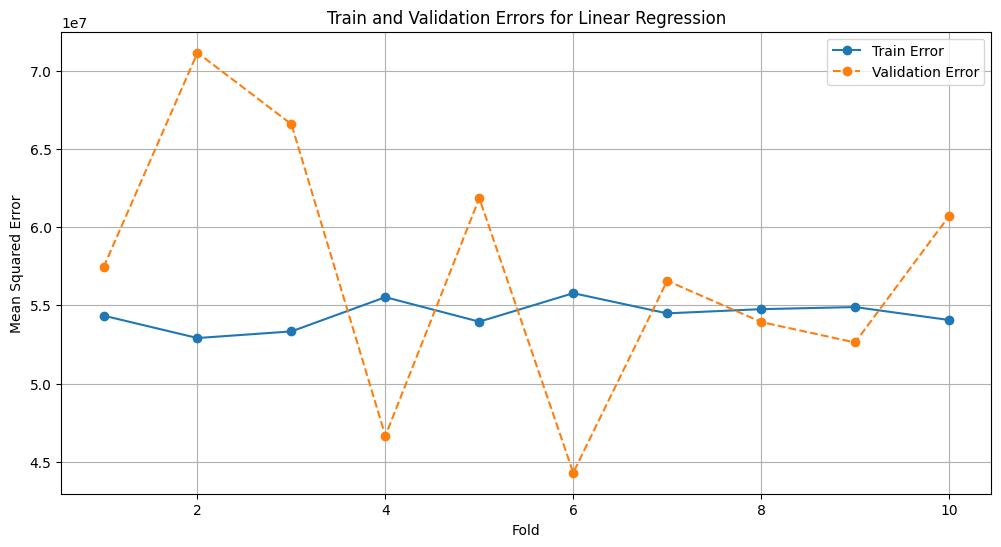

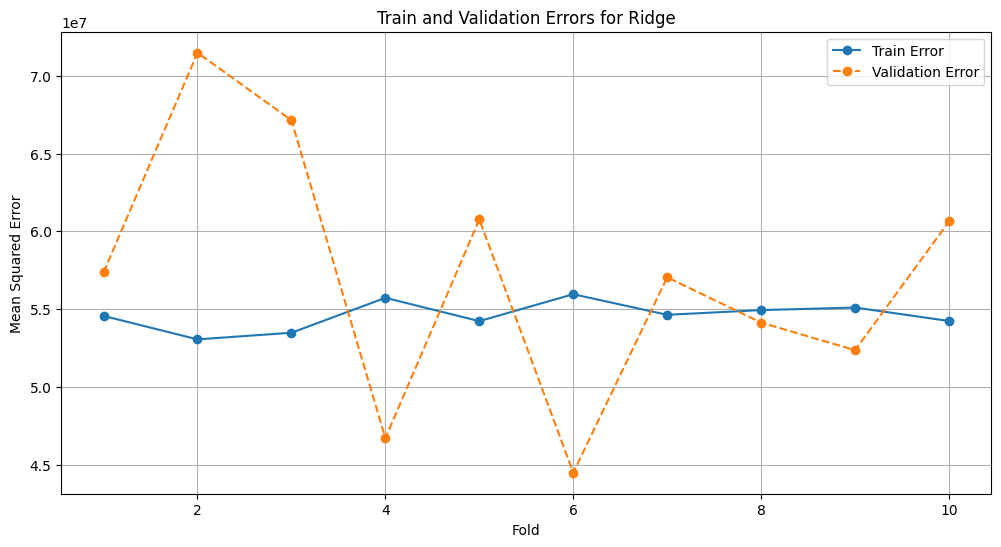

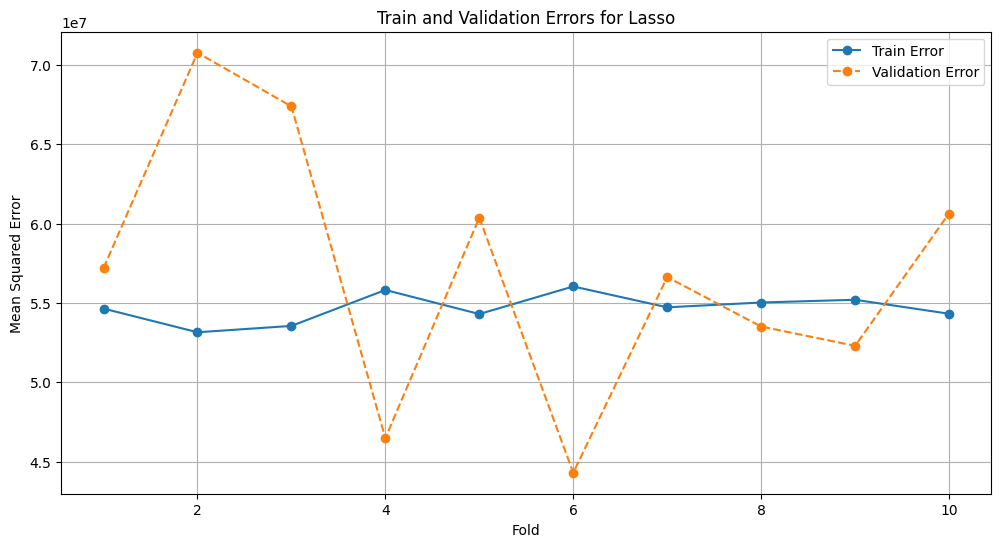

In [77]:
for model_name, metrics in results.items():
    folds = list(range(1, len(metrics['Train Errors']) + 1))

    plt.figure(figsize=(12, 6))
    plt.plot(folds, metrics['Train Errors'], marker='o', linestyle='-', label='Train Error')
    plt.plot(folds, metrics['Validation Errors'], marker='o', linestyle='--', label='Validation Error')
    plt.title(f'Train and Validation Errors for {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

In [78]:
for model_name, model in models.items():
    print(f"\nFinal evaluation on test set for model: {model_name}")

    best_model_params = results[model_name]['Best Parameters'][-1]
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    pipeline.fit(X_train, y_train)

    y_test_pred = pipeline.predict(X_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test R2: {test_r2}")
    print(f"Test MAE: {test_mae}")


Final evaluation on test set for model: Linear Regression
Test MSE: 51924567.07563163
Test RMSE: 7205.870320483962
Test R2: 0.7612345452016234
Test MAE: 5311.993741339492

Final evaluation on test set for model: Ridge
Test MSE: 51502075.30154433
Test RMSE: 7176.494638857074
Test R2: 0.7631772949686382
Test MAE: 5278.109277756673

Final evaluation on test set for model: Lasso
Test MSE: 51421259.579913795
Test RMSE: 7170.861843594102
Test R2: 0.7635489110189342
Test MAE: 5273.516696020088


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+08, tolerance: 7.297e+07



In [79]:
for model_name, model in models.items():
    print(f"\nFeature Importance for model: {model_name}")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    result = permutation_importance(
        pipeline, X_train, y_train, n_repeats=10, random_state=42
    )

    importances = result.importances_mean
    std = result.importances_std

    feature_importance_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": importances, "Std": std}
    )

    feature_importance_df = feature_importance_df.sort_values(
        by="Importance", ascending=False
    )

    print(feature_importance_df)


Feature Importance for model: Linear Regression
                                Feature    Importance           Std
11                    Shelf Life (days)  1.376653e+23  2.017084e+21
32                 Shelf Life Remaining  5.440392e+22  8.979399e+20
31                Days Since Production  4.639177e+22  8.658403e+20
30                Days Until Expiration  4.003811e+22  6.608313e+20
6                          Product Name  3.208552e+22  4.062976e+20
29                         Avg Quantity  1.816431e+22  1.741145e+20
12                    Storage Condition  5.821991e+21  9.493494e+19
40      Avg Reorder Qunatity by Product  4.297740e+21  5.781233e+19
28                       Avg Unit Price  3.902867e+21  4.097802e+19
7                                 Brand  3.886784e+21  6.096821e+19
39        Avg Reorder Qunatity by Brand  3.841119e+21  7.155018e+19
37          Avg Price per Unit by Brand  1.537926e+21  2.107296e+19
5                            Product ID  1.527209e+21  2.551609e+19

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+08, tolerance: 7.297e+07



                                Feature  Importance       Std
10                          Total Value    0.946151  0.017376
38                             Category    0.624993  0.009090
8                  Quantity (liters/kg)    0.169897  0.004701
33                     Price Difference    0.005242  0.000953
11                    Shelf Life (days)    0.003067  0.000807
29                         Avg Quantity    0.002638  0.000525
37          Avg Price per Unit by Brand    0.002535  0.000664
15                    Customer Location    0.002497  0.000595
4                                  Date    0.002459  0.000680
40      Avg Reorder Qunatity by Product    0.001960  0.000499
14                      Expiration Date    0.001816  0.000364
0                              Location    0.001803  0.000629
9                        Price per Unit    0.001178  0.000351
7                                 Brand    0.001129  0.000313
6                          Product Name    0.000965  0.000499
39      